In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random
from datetime import datetime
import scipy
import seaborn as sns
import time

In [121]:
# Read all files in the directory
def read_file(in_folder, percent=1, random=True):
    i = 0
    # Random sampling
    all_files = sorted(os.listdir(in_folder))
    num_files = int(np.floor(len(all_files) * percent))
    if random: 
        chosen_files = random.sample(all_files, num_files)
    else: 
        chosen_files = all_files[:num_files]
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if file_name[-9:] == '.DS_Store':
            continue
        if i == 0:
            df = pd.read_csv(file_name)
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
        i +=1
    print('Number of files:',format(i))
    return df

In [124]:
# df_0 = read_file('data/', percent=0.04) # 16 files
df_0 = read_file('../../data/data/', percent=0.15, random=False) # 16 files

../../data/data/.DS_Store
../../data/data/uk_obs_coordinates_000000000000
../../data/data/uk_obs_coordinates_000000000001
../../data/data/uk_obs_coordinates_000000000002
../../data/data/uk_obs_coordinates_000000000003
../../data/data/uk_obs_coordinates_000000000004
../../data/data/uk_obs_coordinates_000000000005
../../data/data/uk_obs_coordinates_000000000006
../../data/data/uk_obs_coordinates_000000000007
../../data/data/uk_obs_coordinates_000000000008
../../data/data/uk_obs_coordinates_000000000009
../../data/data/uk_obs_coordinates_000000000010
Number of files: 11


In [125]:
df_0.shape

(36979929, 6)

In [126]:
df_0['Level'].unique()

array(['1st Floor', '2nd Floor'], dtype=object)

In [127]:
df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor', '3rd Floor']),:]

Site      Level      ClientMacAddr        lat       lng  \
0         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460788 -0.932288   
2         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
3         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460782 -0.932292   
4         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460782 -0.932292   
...             ...        ...                ...        ...       ...   
36979924  UK Office  1st Floor  48:a4:72:ae:11:a9  51.460399 -0.932820   
36979925  UK Office  1st Floor  48:45:20:37:d1:6f  51.460476 -0.933072   
36979926  UK Office  1st Floor  6c:c7:ec:59:da:b9  51.460601 -0.932293   
36979927  UK Office  1st Floor  28:16:ad:17:e4:db  51.460557 -0.932404   
36979928  UK Office  1st Floor  6c:96:cf:c3:45:4f  51.460903 -0.932316   

                            localtime  
0         2020-09-01 23:58:49.582 UTC  
1         2020-09-01 23:58:45.435 UTC  
2         2020-09-01 23:58:38.112 UTC  
3         2020-09-01 23:58:35.379 UTC  
4         2020-09-01 23:58:29.827 UTC  
...                               ...  
36979924  2019-10-15 16:41:08.837 UTC  
36979925  2019-10-15 16:41:08.737 UTC  
36979926  2019-10-15 16:41:08.639 UTC  
36979927  2019-10-15 16:41:08.534 UTC  
36979928  2019-10-15 16:41:08.339 UTC  

[36979929 rows x 6 columns]

### Data cleaning

In [128]:
## Clean data at 1st - 3rd floor 
df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 36979929


index       Site      Level      ClientMacAddr        lat  \
17185345  36979920  UK Office  1st Floor  3c:f7:a4:44:a5:39  51.460409   
17185346  36979922  UK Office  1st Floor  8c:8e:f2:06:02:bb  51.460391   
17185347  36979923  UK Office  1st Floor  5c:5f:67:8c:0e:60  51.460394   
17185348  36979924  UK Office  1st Floor  48:a4:72:ae:11:a9  51.460399   
17185349  36979925  UK Office  1st Floor  48:45:20:37:d1:6f  51.460476   

               lng                    localtime  
17185345 -0.932658  2019-10-15 16:41:08.939 UTC  
17185346 -0.932832  2019-10-15 16:41:08.837 UTC  
17185347 -0.932726  2019-10-15 16:41:08.837 UTC  
17185348 -0.932820  2019-10-15 16:41:08.837 UTC  
17185349 -0.933072  2019-10-15 16:41:08.737 UTC

In [129]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


index       Site      Level      ClientMacAddr        lat  \
13885110  36979898  UK Office  1st Floor  00:b3:62:4e:0f:c9  51.460649   
13885111  36979913  UK Office  1st Floor  14:ab:c5:09:b7:17  51.460854   
13885112  36979926  UK Office  1st Floor  6c:c7:ec:59:da:b9  51.460601   
13885113  36979927  UK Office  1st Floor  28:16:ad:17:e4:db  51.460557   
13885114  36979928  UK Office  1st Floor  6c:96:cf:c3:45:4f  51.460903   

               lng                    localtime  
13885110 -0.932257  2019-10-15 16:41:09.738 UTC  
13885111 -0.932292  2019-10-15 16:41:09.337 UTC  
13885112 -0.932293  2019-10-15 16:41:08.639 UTC  
13885113 -0.932404  2019-10-15 16:41:08.534 UTC  
13885114 -0.932316  2019-10-15 16:41:08.339 UTC

In [130]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 31070465


Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
5  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
6  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
7  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
8  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
9  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                     localtime  
0  2020-09-01 23:58:49.582 UTC  
1  2020-09-01 23:58:38.112 UTC  
2  2020-09-01 23:58:29.514 UTC  
3  2020-09-01 23:58:18.046 UTC  
4  2020-09-01 23:58:09.522 UTC  
5  2020-09-01 23:57:57.986 UTC  
6  2020-09-01 23:57:44.417 UTC  
7  2020-09-01 23:57:34.422 UTC  
8  2020-09-01 23:57:27.891 UTC  
9  2020-09-01 23:57:19.409 UTC

In [131]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='3rd Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [132]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 31070465


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31070465 entries, 0 to 31070464
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 1.4+ GB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [134]:
start_time = time.time()
df['localtime'] = pd.to_datetime(df['localtime'] , format="%Y/%m/%d %H:%M:%S")
print("--- %s mins ---" % (int(time.time() - start_time)/60))

start_time = time.time()
df['date']  = df['localtime'].dt.date
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
print("--- %s mins ---" % (int(time.time() - start_time)/60))

In [135]:
# df.head()

In [136]:
start_time = time.time()
df['localtime'] = df['localtime'].astype('datetime64[ns]')
print("--- %s mins ---" % (int(time.time() - start_time)/60))

start_time = time.time()
df['date']  = df['localtime'].dt.date
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
print("--- %s mins ---" % (int(time.time() - start_time)/60))
# df['day']   = df['localtime'].dt.day

--- 29.783333333333335 mins ---
--- 2.25 mins ---


In [137]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                localtime        date      time  dayOfWeek  IsWeekend  
0 2020-09-01 23:58:49.582  2020-09-01  23:58:49          1      False  
1 2020-09-01 23:58:38.112  2020-09-01  23:58:38          1      False  
2 2020-09-01 23:58:29.514  2020-09-01  23:58:29          1      False  
3 2020-09-01 23:58:18.046  2020-09-01  23:58:18          1      False  
4 2020-09-01 23:58:09.522  2020-09-01  23:58:09          1      False

In [138]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-09-05
2020-09-01


## Frequency in days

In [139]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

ClientMacAddr  total_day  total_signal
0     00:08:22:00:b9:fb          1            13
1     00:08:22:0a:b9:fb          1             1
2     00:08:22:0e:c4:fb          1             2
3     00:08:22:20:bc:fb          1             6
4     00:08:22:24:b7:fb          1            11
...                 ...        ...           ...
8862  fc:a6:67:be:c0:a5          4           300
8863  fc:d8:48:80:ab:de          2           315
8864  fc:db:b3:31:4e:a8          1            13
8865  fc:f8:ae:5a:6f:ea          1           321
8866  fc:fc:48:36:16:6b          1           114

[8867 rows x 3 columns]

In [140]:
# Frequency in days
frequency['total_day'].value_counts()

1     6439
2      634
3      248
4      178
5      139
      ... 
55       1
64       1
49       1
59       1
67       1
Name: total_day, Length: 65, dtype: int64

## Weekend & Weekday

In [141]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

ClientMacAddr  IsWeekend  Days
0     00:08:22:00:b9:fb      False     1
1     00:08:22:0a:b9:fb      False     1
2     00:08:22:0e:c4:fb      False     1
3     00:08:22:20:bc:fb      False     1
4     00:08:22:24:b7:fb      False     1
...                 ...        ...   ...
8955  fc:a6:67:be:c0:a5      False     4
8956  fc:d8:48:80:ab:de      False     2
8957  fc:db:b3:31:4e:a8      False     1
8958  fc:f8:ae:5a:6f:ea      False     1
8959  fc:fc:48:36:16:6b      False     1

[8960 rows x 3 columns]

In [142]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

ClientMacAddr  Days
5406  9c:8c:6e:46:0b:7c   179
5410  9c:8c:6e:46:1c:5e   179
5041  8c:f5:a3:cd:d2:db   112
1605  40:83:de:81:43:54    89
4797  88:66:a5:45:b9:ea    88
...                 ...   ...
3576  80:58:f8:6a:40:60     1
3575  80:58:f8:69:f7:f3     1
3574  80:58:f8:69:d1:39     1
3573  80:58:f8:69:52:72     1
8959  fc:fc:48:36:16:6b     1

[8820 rows x 2 columns]

In [143]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
print(df_weekend.shape)
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

(140, 2)


ClientMacAddr  Days
5407  9c:8c:6e:46:0b:7c    68
5411  9c:8c:6e:46:1c:5e    68
4798  88:66:a5:45:b9:ea    39
5878  ac:d1:b8:03:40:8f    27
5405  9c:8c:6e:46:01:f8    24
...                 ...   ...
1459  38:80:df:e4:09:0c     1
1186  30:07:4d:ca:1b:9a     1
1163  30:07:4d:19:7b:f4     1
1017  24:df:6a:62:fd:8c     1
8914  f8:c3:9e:8b:fe:9b     1

[140 rows x 2 columns]

In [144]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

9c:8c:6e:46:0b:7c
57.8257822867231


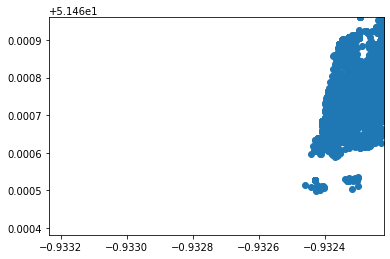

9c:8c:6e:46:1c:5e
92.30240052865537


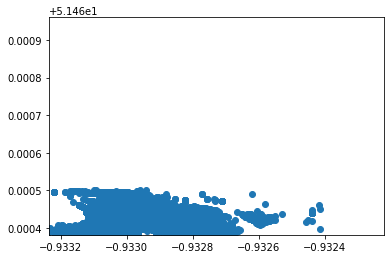

88:66:a5:45:b9:ea
127.85622492418467


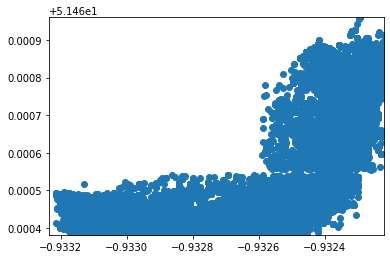

ac:d1:b8:03:40:8f
86.02421360782003


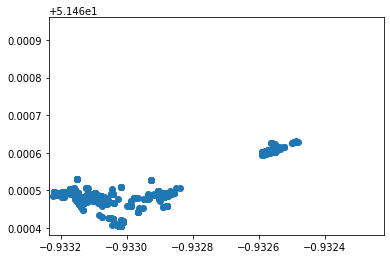

9c:8c:6e:46:01:f8
70.52782222039136


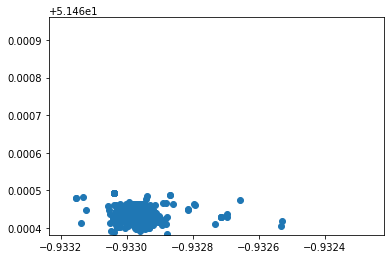

9c:8c:6e:46:0c:52
39.170657681097495


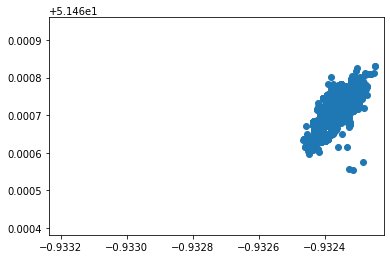

98:10:e8:3a:c9:e4
128.37634248986254


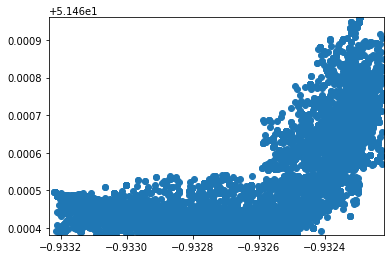

cc:c0:79:0b:9a:2a
35.28384591546263


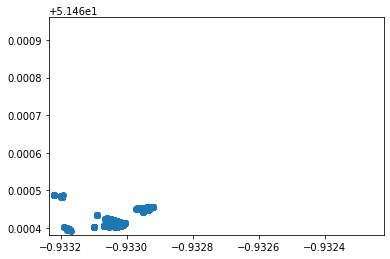

8c:fe:57:80:c3:d3
64.8715362727192


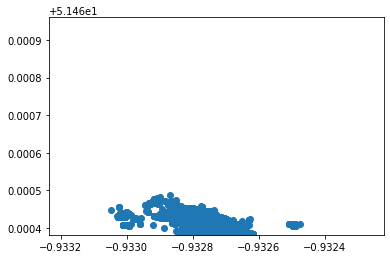

30:07:4d:5e:a6:6c
125.84357824044197


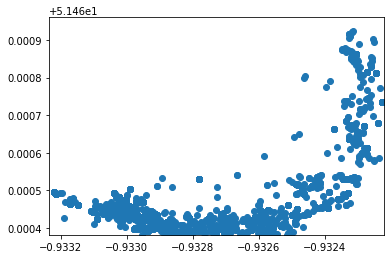

bc:b8:63:9f:29:b4
23.61694301927389


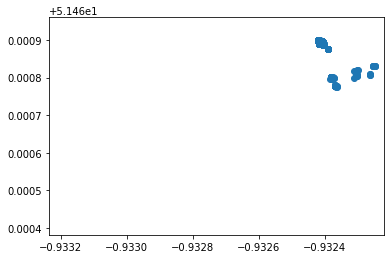

38:f9:d3:20:de:d9
29.48215774288069


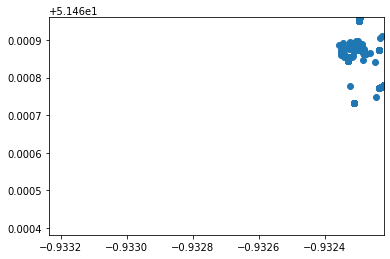

04:ea:56:92:f9:9b
62.89578475915057


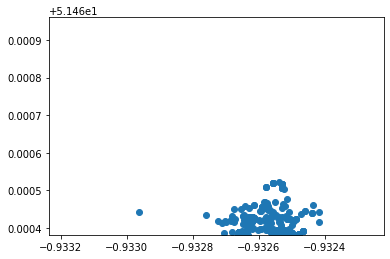

00:c2:c6:cc:a8:85
107.9945757716326


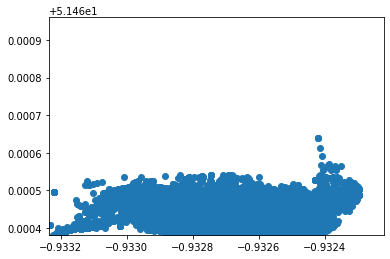

04:d6:aa:88:5d:e1
127.86683879259616


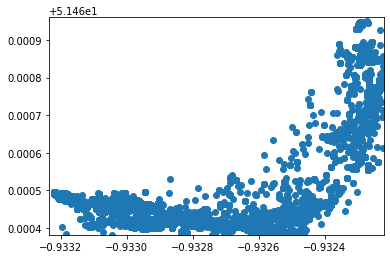

c4:6e:1f:1a:81:1d
115.10015181958742


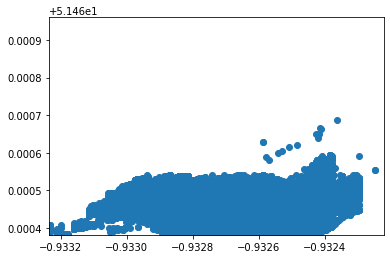

38:f9:d3:20:e5:81
87.805535455078


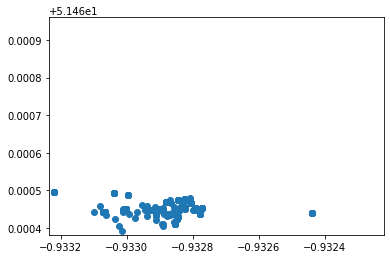

38:f9:d3:20:e7:9a
67.24019072315194


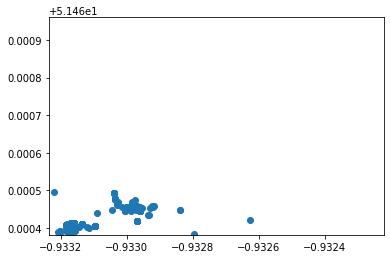

48:a4:72:ae:11:81
32.16388373341691


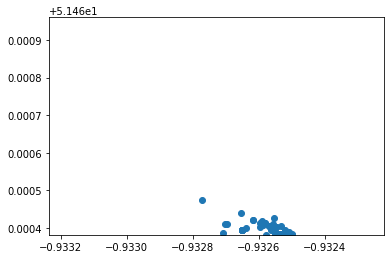

2c:78:0e:87:14:64
122.4315337545206


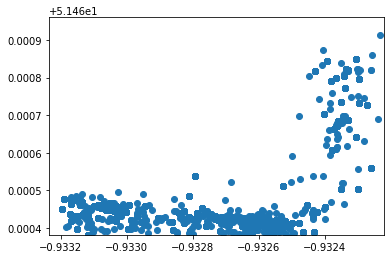

38:f9:d3:20:e2:93
57.53806717814081


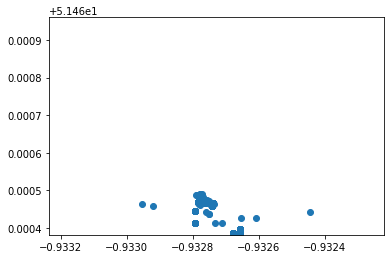

38:f9:d3:20:e9:47
21.05222536598994


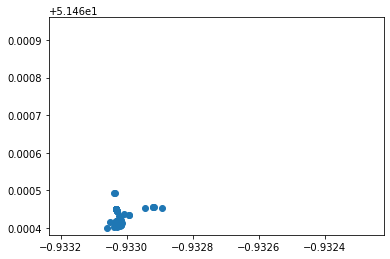

c4:6e:1f:1a:68:a1
64.978749551263


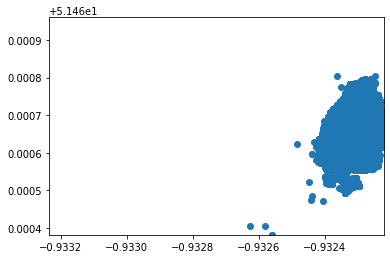

c4:6e:1f:1b:4f:c0
70.38144545725237


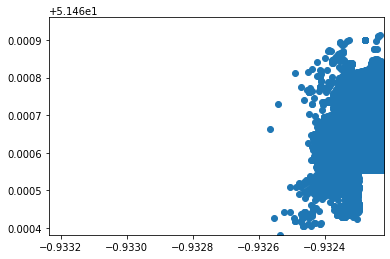

a4:e9:75:77:7e:c3
80.58254305110998


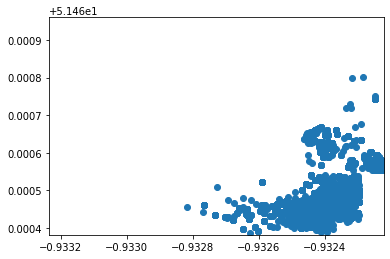

b0:19:c6:df:a0:86
46.994294981851645


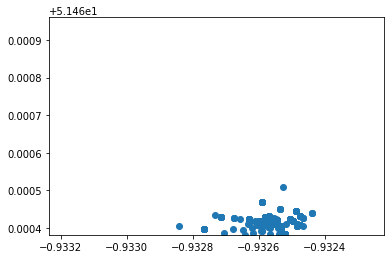

38:f9:d3:20:2c:b5
42.415038936610706


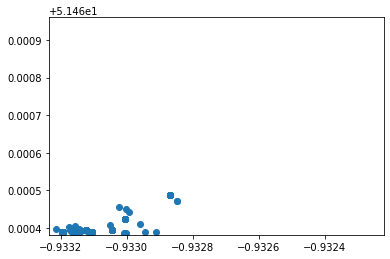

80:e6:50:5e:1f:85
99.59124073735177


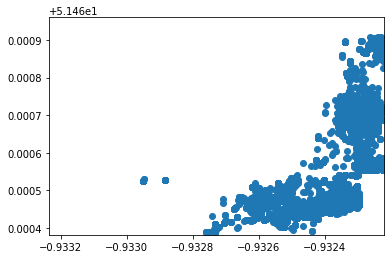

38:f9:d3:20:2b:a6
51.39840831043339


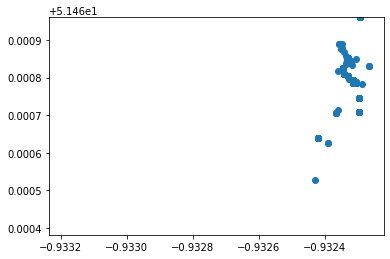

14:87:6a:b1:7d:16
45.168024274418656


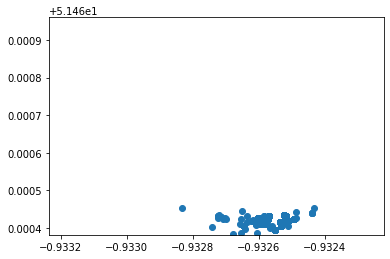

c0:b6:58:a2:3c:78
126.0392530416211


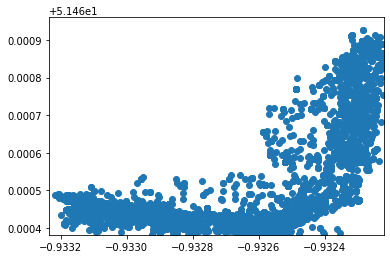

38:f9:d3:20:31:55
22.375842061687944


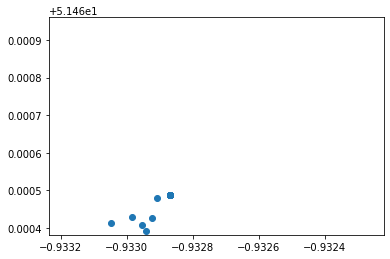

1c:5c:f2:e8:8b:33
59.766694983649984


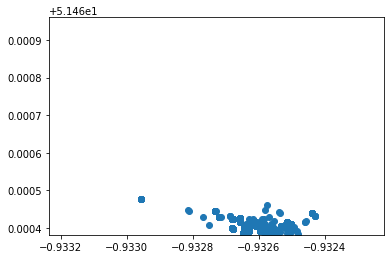

98:84:e3:d8:80:60
20.514028165774313


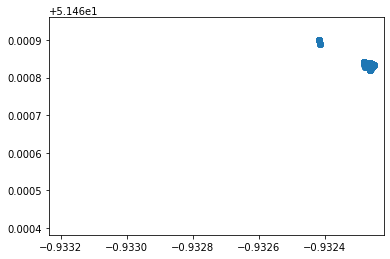

38:f9:d3:1e:30:df
45.75622754409879


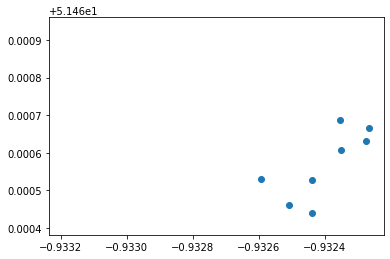

60:64:05:c6:51:76
20.643379925321057


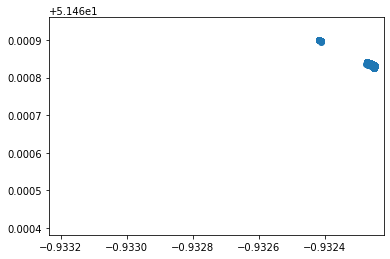

38:f9:d3:20:e5:75
41.5280408597362


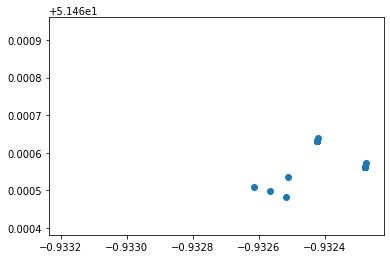

34:a3:95:3f:a2:ad
126.58678709613439


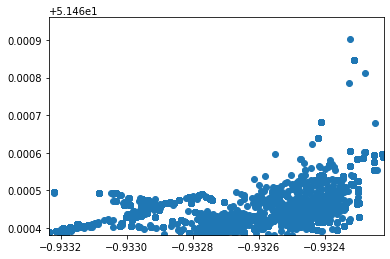

64:6e:69:d9:fc:8b
23.4318506075391


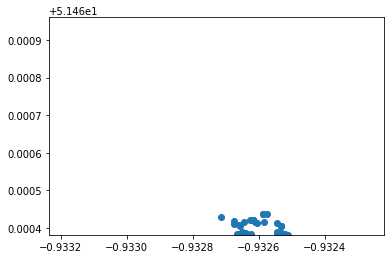

7c:b3:7b:19:5b:e4
34.45389362041756


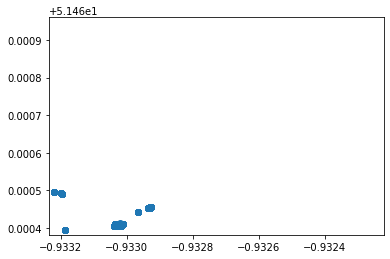

24:1b:7a:b1:f2:ef
44.78696493598359


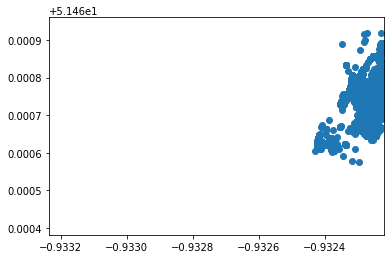

b0:68:e6:4e:62:d4
13.931136967000382


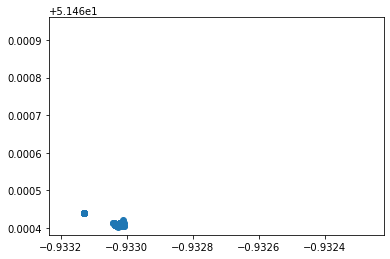

38:f9:d3:20:39:f0
36.43201945867203


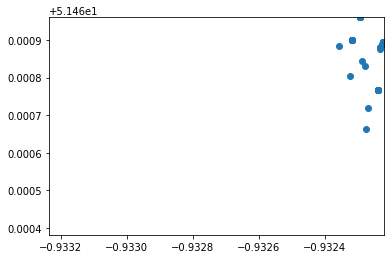

50:de:06:28:65:49
54.31492209266043


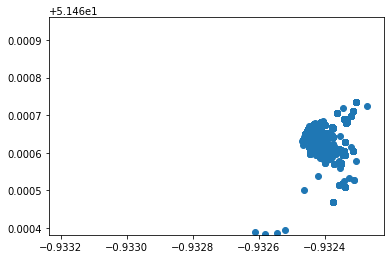

38:f9:d3:20:2d:c0
69.21411520519423


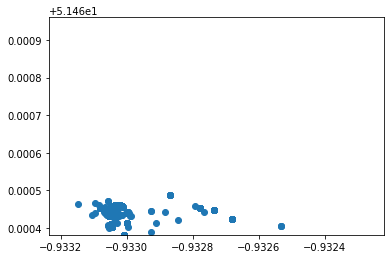

38:f9:d3:20:2f:38
23.17092134040841


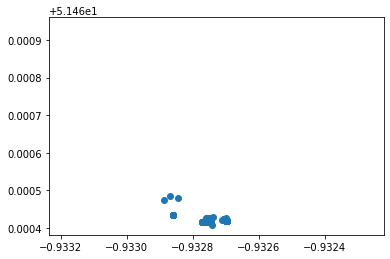

e8:de:27:9f:7f:0c
49.800277241962604


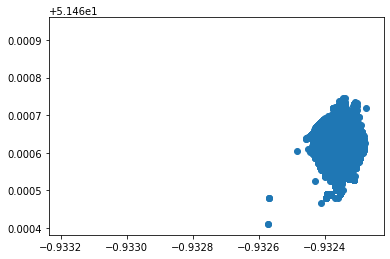

ec:1f:72:28:28:9d
127.4017342623469


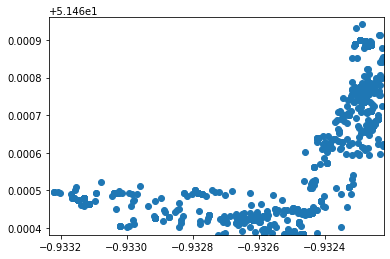

88:63:df:a3:fe:53
36.82414981074715


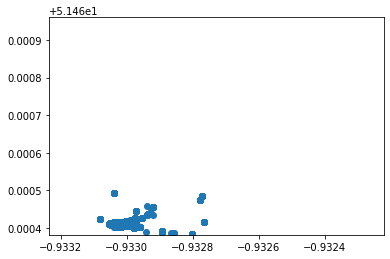

c4:6e:1f:1c:f2:9b
60.796598891669724


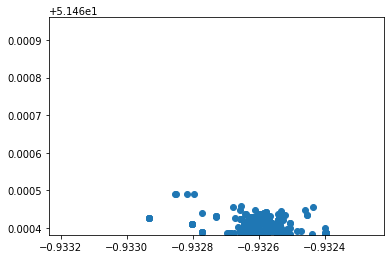

38:f9:d3:20:e7:b8
37.70985318186227


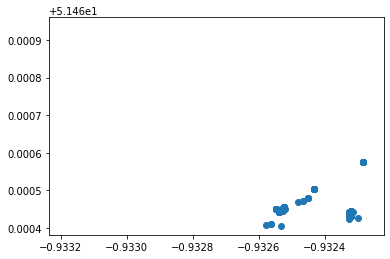

4c:34:88:f6:62:9c
18.949780860205575


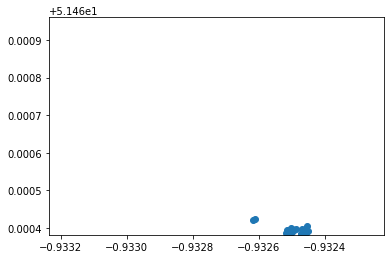

f0:c3:71:ae:e5:0c
22.97125463215126


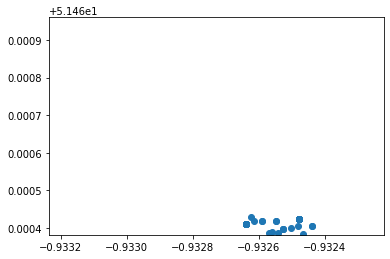

8c:fe:57:7c:b1:ce
21.157608424594347


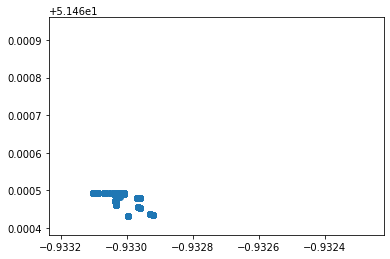

00:0b:82:d0:ff:35
47.88059591846994


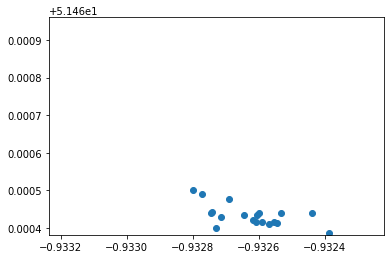

b4:9c:df:87:2d:eb
93.2396318029223


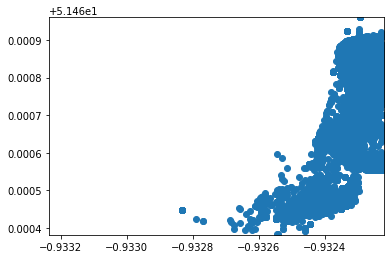

34:e1:2d:c6:a8:59
97.98494784396887


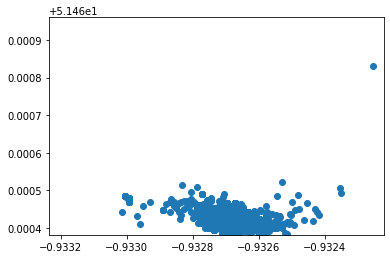

30:07:4d:32:cc:2f
123.99883988933887


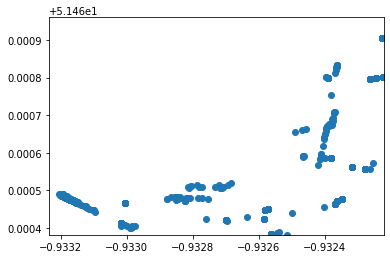

c4:6e:1f:1b:72:40
32.130318245874804


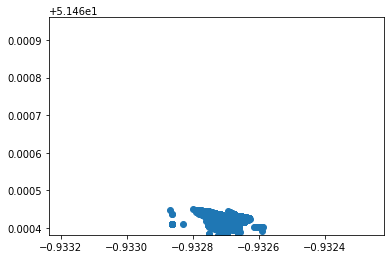

c0:e8:62:e6:cc:e4
122.77408775286251


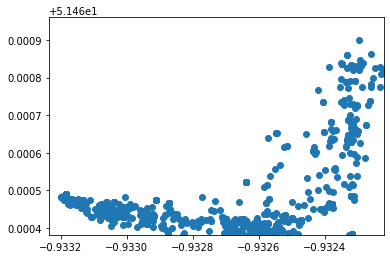

38:f9:d3:20:31:32
18.965534516121433


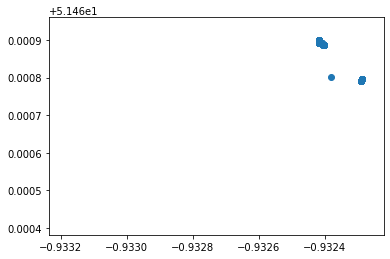

c4:93:d9:0e:6d:dd
119.55961431291767


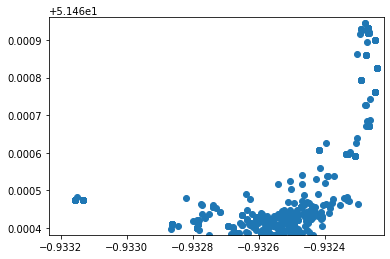

f4:5c:89:db:fb:7f
49.16266944808749


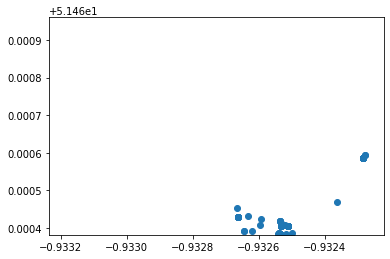

bc:98:df:ba:d4:93
0.0


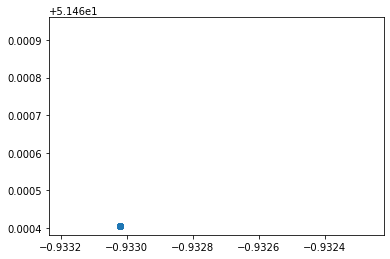

9c:28:bf:6d:18:f2
4.333658847613236


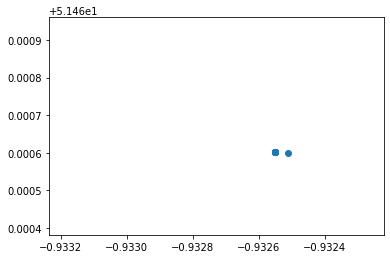

9c:4e:36:92:ec:e4
2.1170521214254108


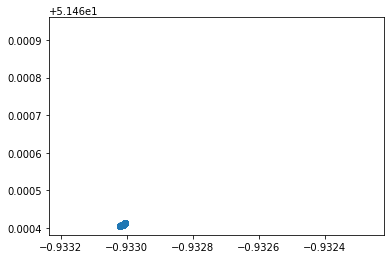

b4:9c:df:3e:14:c2
119.36580030575486


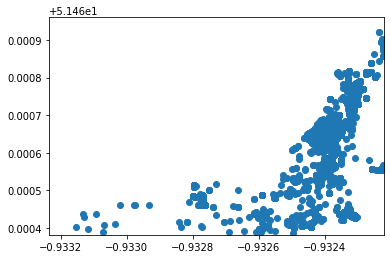

98:84:e3:eb:80:8c
1.3984548683299363


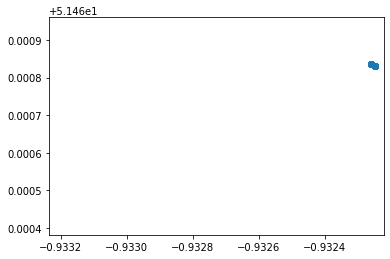

f0:99:19:20:9c:e2
18.48263137575281


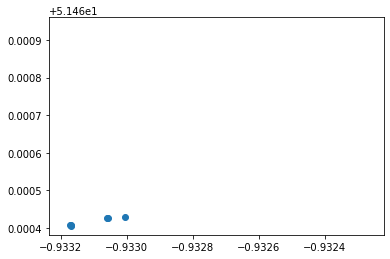

bc:ff:eb:c9:79:f0
0.0


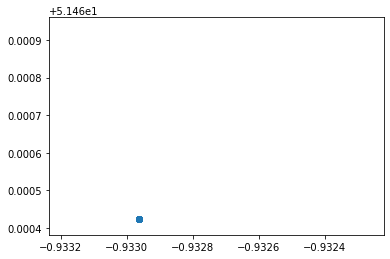

9c:4e:36:94:e1:98
0.8749219519002887


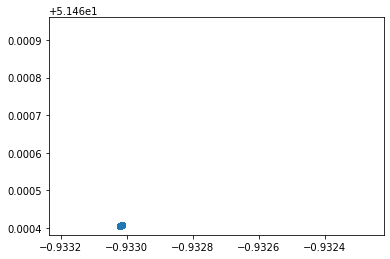

ec:ad:b8:7d:23:e8
58.208370833482


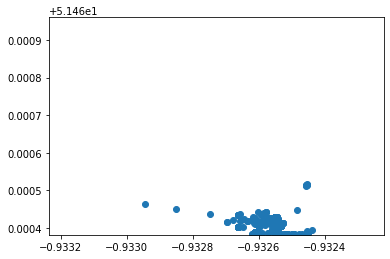

b0:7e:11:33:f0:22
8.808211391639672


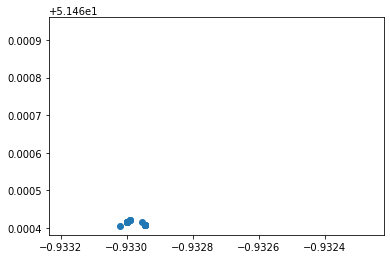

cc:73:14:6b:25:58
22.228992042323547


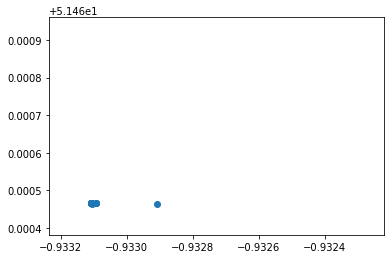

e8:9e:b4:b5:9d:13
20.963568646963335


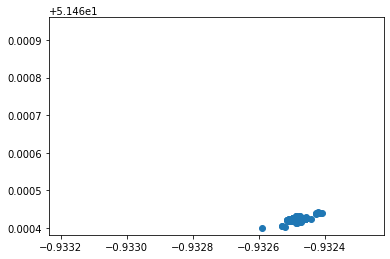

cc:73:14:6b:c9:23
0.0


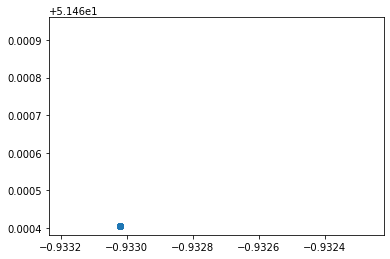

9c:b6:d0:e2:71:b5
35.03135769417492


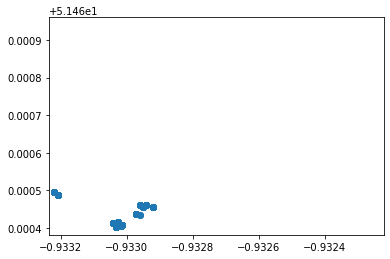

9c:da:3e:7f:a1:98
65.28710583638129


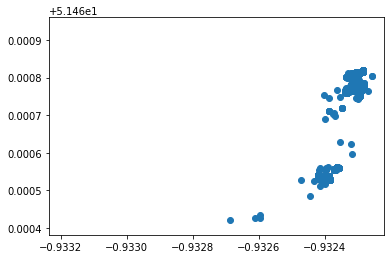

a4:c3:f0:4a:7a:0e
0.0


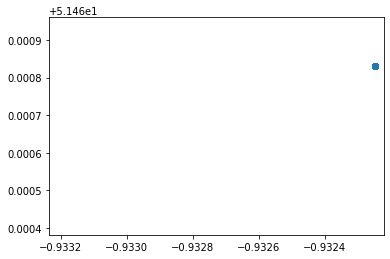

a4:e4:b8:aa:c7:8d
33.89775568310196


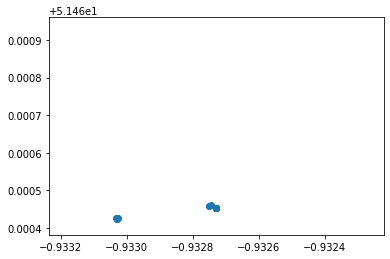

c4:36:6c:19:9a:e7
0.0


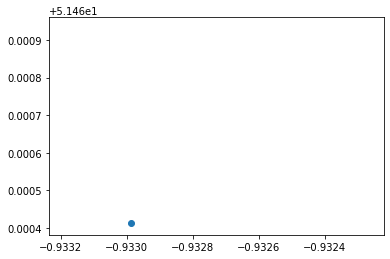

e8:6f:38:77:20:fd
0.0


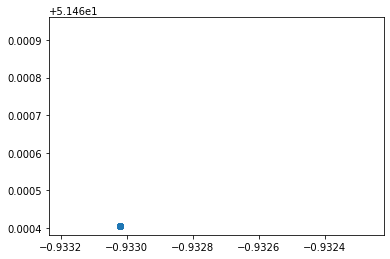

e4:a7:a0:99:dc:9d
93.9742181734747


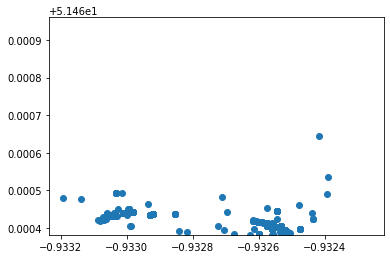

a8:3e:0e:3c:e7:d4
1.3847710011054675


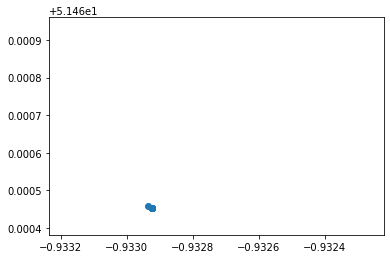

a8:51:5b:4e:3a:49
3.0785890502268836


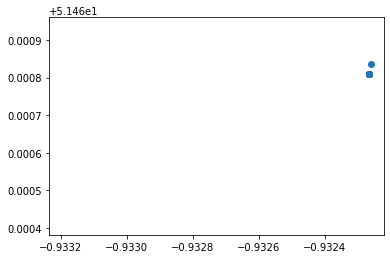

a8:96:75:26:46:d4
3.132292179776864


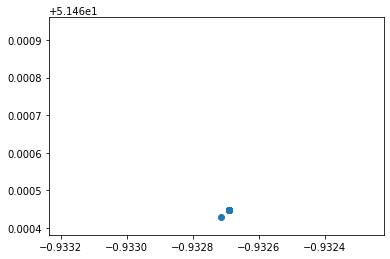

a8:96:75:37:7b:2d
0.0


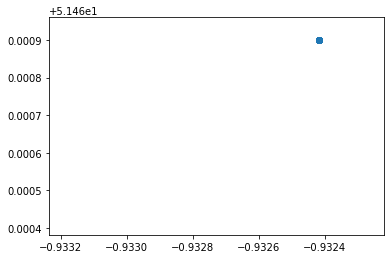

d4:38:9c:c6:ee:61
22.42721371583633


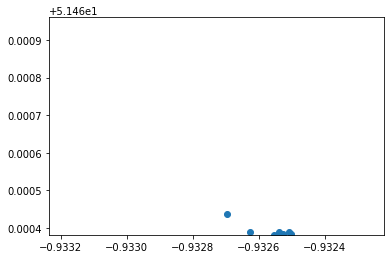

ac:af:b9:6c:8f:96
115.7221377181684


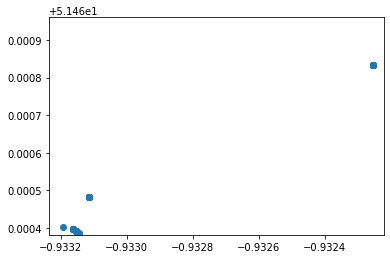

58:c5:cb:5b:3f:d7
122.08999471071358


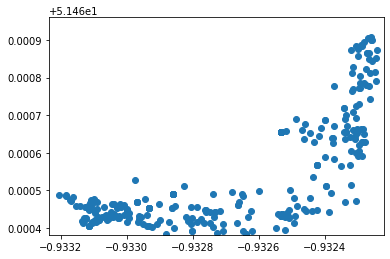

98:10:e8:39:b8:4d
129.71422453632226


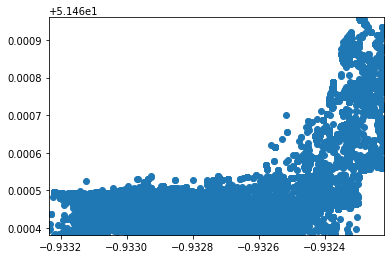

00:10:20:cd:a0:b1
0.6348931791719115


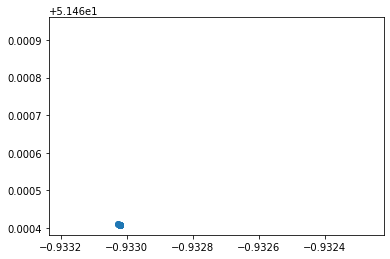

04:f0:21:1e:59:ef
4.10160362801108


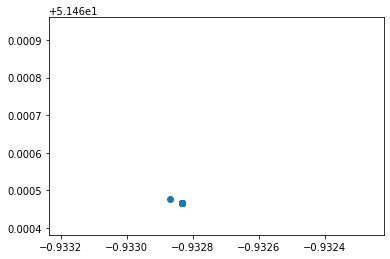

04:d6:aa:d2:00:15
0.0


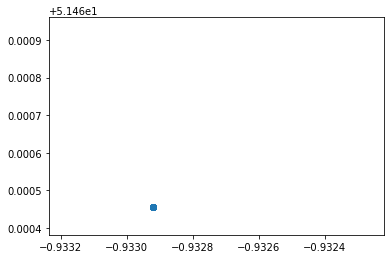

04:d6:aa:44:28:d0
114.78027359681109


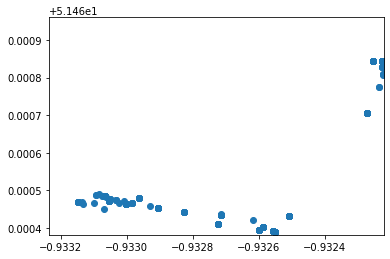

04:d6:aa:08:86:f1
68.14813319047235


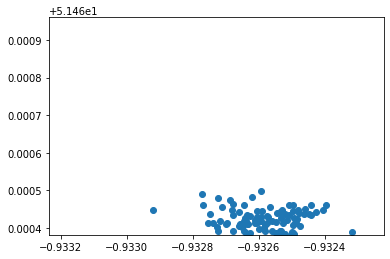

04:d3:95:aa:89:0a
0.7885356450217765


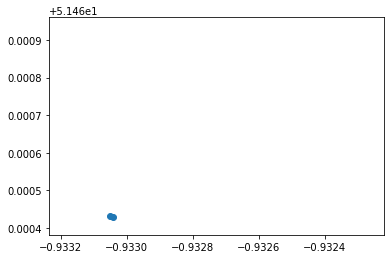

04:d3:95:0a:c6:30
4.457744585457772


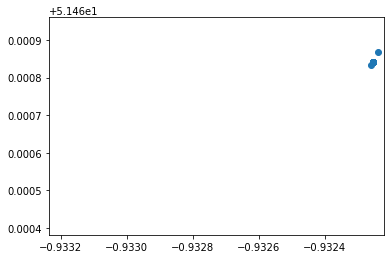

04:b4:29:77:c9:19
42.88021501372341


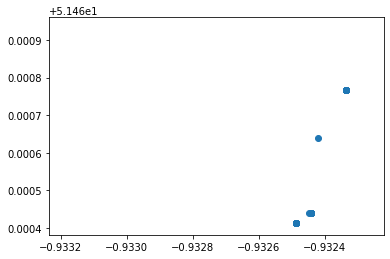

04:b4:29:0c:d8:e5
102.28365812499617


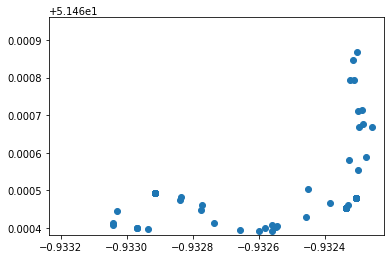

00:c2:c6:f9:2f:9f
65.20627817380966


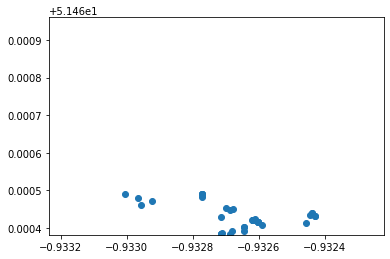

00:80:92:df:7b:97
28.46263928012078


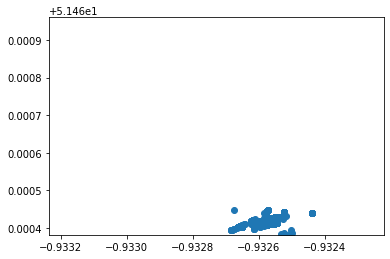

00:0c:e7:fe:46:63
0.0


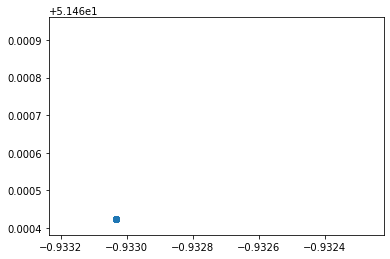

8c:f5:a3:e2:40:00
116.53975702063755


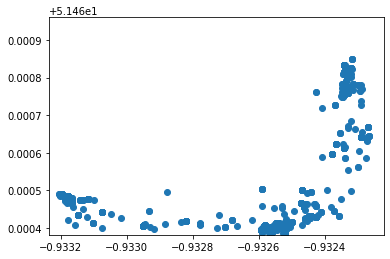

00:0c:e7:f4:04:28
8.852520572220094


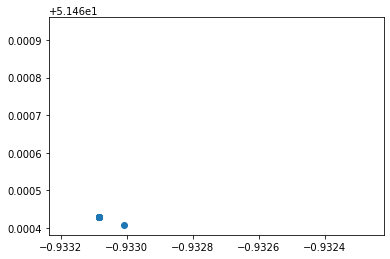

00:0c:e7:db:d4:b1
0.0


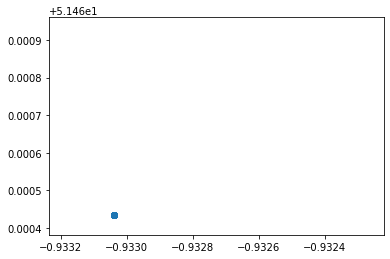

00:0c:e7:c9:db:14
9.932561333506788


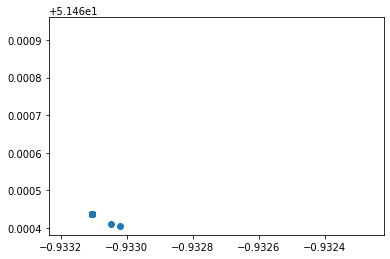

00:0c:e7:c4:16:29
0.7775793964556169


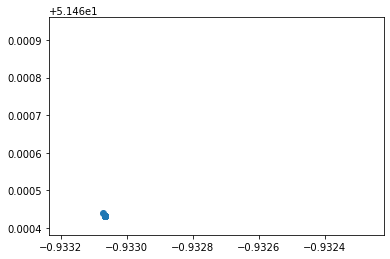

00:0c:e7:ba:cc:c1
2.0838553435012477


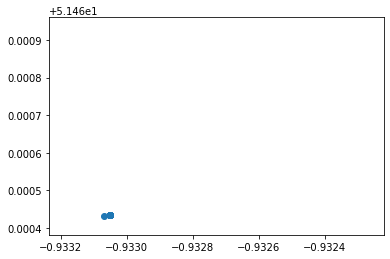

00:0c:e7:b8:7f:27
0.0


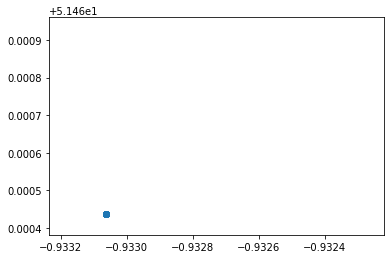

00:0c:e7:91:83:06
0.0


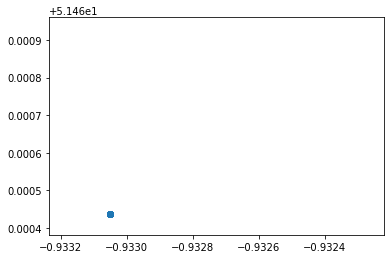

00:0c:e7:72:69:3e
4.46988138609342


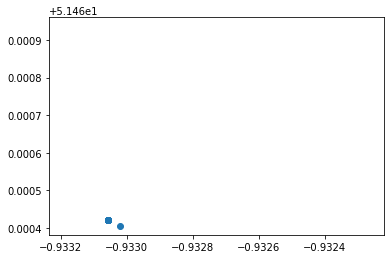

00:0c:e7:69:dc:0d
0.0


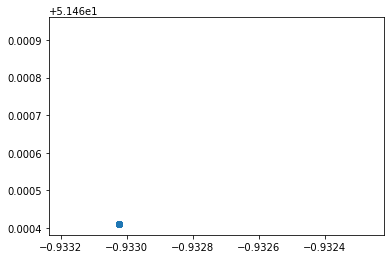

00:0c:e7:32:83:c6
0.0


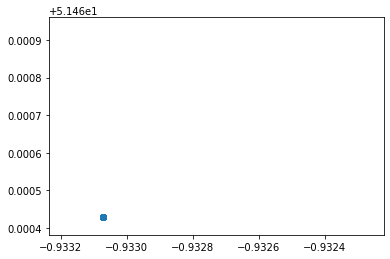

08:cc:27:fa:00:09
0.0


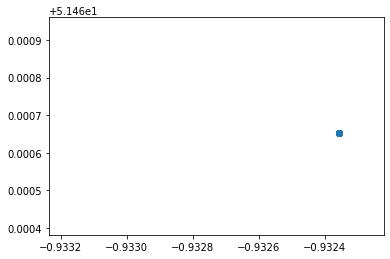

18:21:95:00:89:bd
112.80773111670753


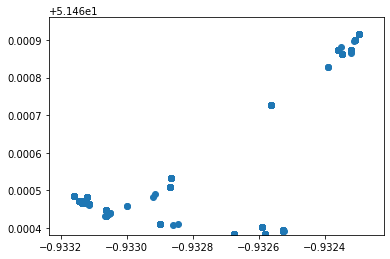

1c:65:9d:97:84:8c
22.19996544512186


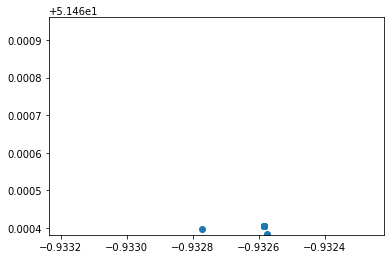

20:39:56:40:e8:a5
0.0


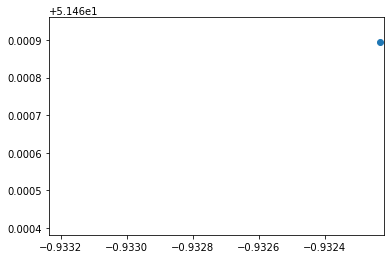

8c:f5:a3:ca:f5:69
105.80849324791953


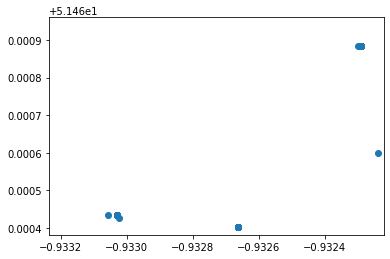

7c:b2:7d:86:43:9f
9.34578438455938


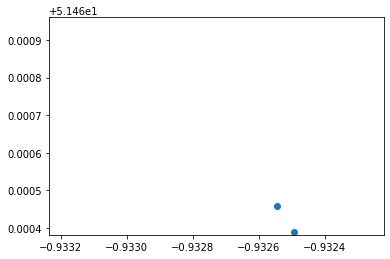

7c:a1:77:2e:6c:94
33.45755009349639


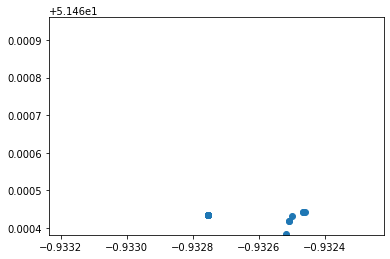

74:d2:1d:ab:42:30
0.0


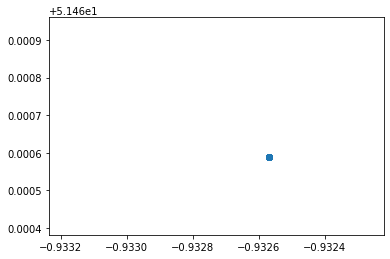

70:28:8b:6f:ed:b0
25.92784118611659


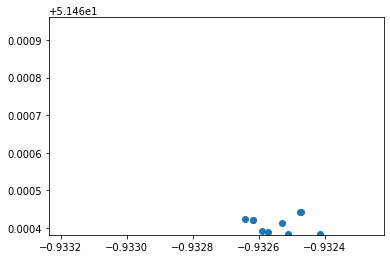

5c:ad:cf:c2:25:b8
97.0128646299148


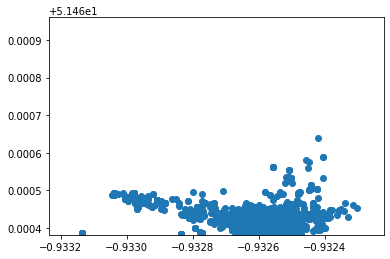

58:d9:c3:3a:01:8d
1.980411021711998


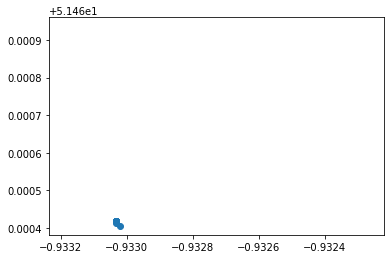

00:0c:e7:13:8f:36
1.5357454711451102


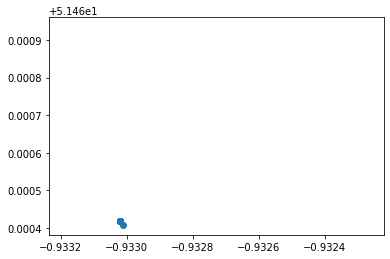

58:b1:0f:4c:45:00
0.0


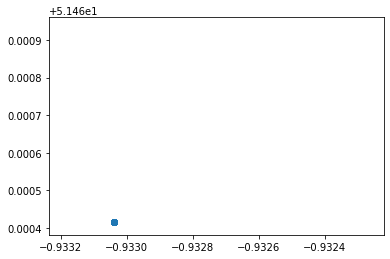

58:20:b1:5d:8a:8d
11.870891763787883


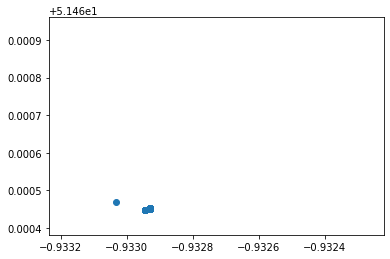

48:5f:99:50:d5:13
34.35816265253959


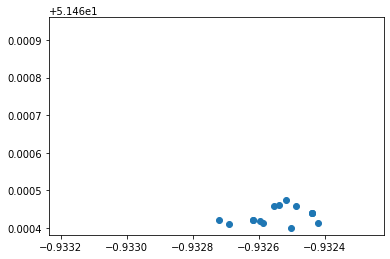

48:5a:3f:64:dc:c2
8.010190151887475


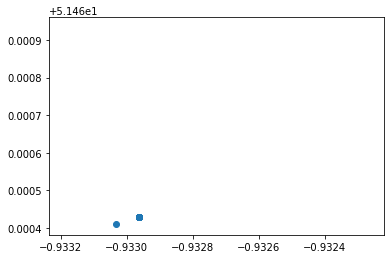

40:88:05:54:e0:02
19.502767083334557


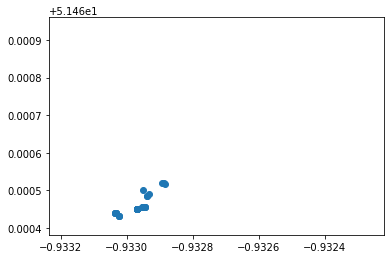

40:88:05:2f:f7:b3
82.73609928493701


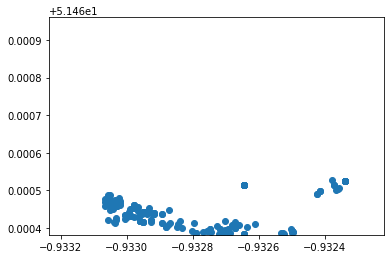

3c:57:6c:ca:9e:ee
4.447866268730638


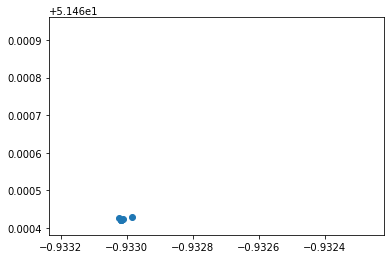

3c:28:6d:f5:a2:6f
2.325085237971585


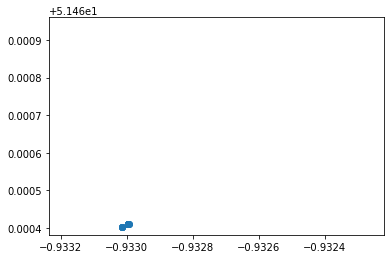

38:f9:d3:20:2d:00
33.78070766315812


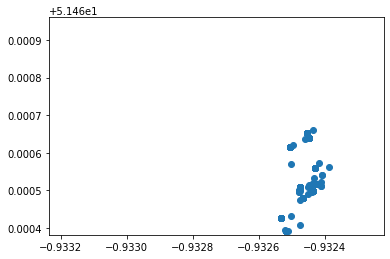

38:80:df:e4:09:0c
7.659088253185012


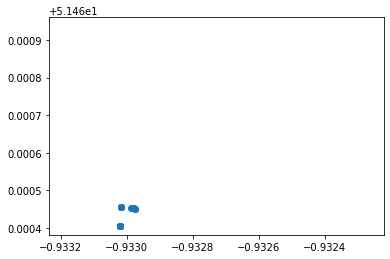

30:07:4d:ca:1b:9a
2.690061666724379


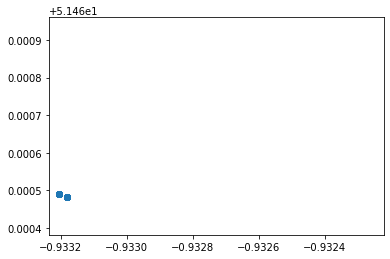

30:07:4d:19:7b:f4
23.752136976040873


24:df:6a:62:fd:8c
0.0


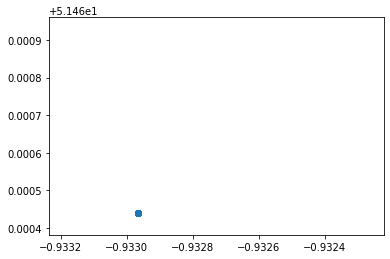

f8:c3:9e:8b:fe:9b
104.20219744817742


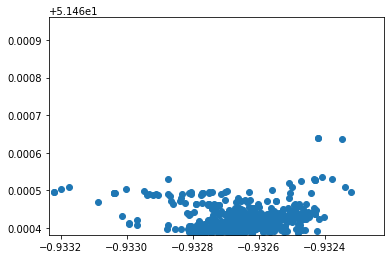

In [147]:
# Visualize the distance for weekend mac id
weekend_presence = np.array(df_weekend['ClientMacAddr'])
for i in weekend_presence :
    person = df[df['ClientMacAddr'] == i ]
    print(i)
    person_min_lng = min(person['lng'])
    person_max_lng = max(person['lng'])
    person_min_lat = min(person['lat'])
    person_max_lat = max(person['lat'])
    person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
    print(person_distance)
    plt.scatter(person['lng'], person['lat'])
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.show()

In [185]:
# Distribution for max distance
temp1 = df.groupby('ClientMacAddr')['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby('ClientMacAddr')['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on='ClientMacAddr')
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
6391  cc:73:14:60:68:97  51.460960  51.460382 -0.932221 -0.933236   
5172  98:10:e8:06:85:6a  51.460960  51.460382 -0.932221 -0.933236   
5896  b4:9c:df:55:39:9a  51.460960  51.460382 -0.932221 -0.933236   
6319  cc:44:63:32:20:55  51.460960  51.460382 -0.932221 -0.933236   
4643  88:66:a5:0e:e4:28  51.460960  51.460382 -0.932221 -0.933235   
...                 ...        ...        ...       ...       ...   
2867  80:58:f8:08:a7:46  51.460491  51.460491 -0.932771 -0.932771   
6028  bc:98:df:c0:5c:ce  51.460442  51.460442 -0.933142 -0.933142   
6029  bc:98:df:de:2b:7b  51.460404  51.460404 -0.933021 -0.933021   
2865  80:58:f8:08:3b:37  51.460779  51.460779 -0.932250 -0.932250   
6661  d0:77:14:34:57:b2  51.460476  51.460476 -0.933180 -0.933180   

      Distance(Meter)  total_day  total_signal  
6391       129.879876         44         74024  
5172       129.861023         32         57059  
5896       129.845072         15         13865  
6319       129.792706         32         56917  
4643       129.785866         29         33976  
...               ...        ...           ...  
2867         0.000000          1            13  
6028         0.000000          1            13  
6029         0.000000          1            13  
2865         0.000000          1            12  
6661         0.000000          1            12  

[8867 rows x 8 columns]

In [186]:
# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})

## Remove outliers: remove ClientMacAddr that has only 1 signal (row)
df_temp = df_temp.loc[df_temp['total_signal'] > 1,:]
df_temp

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
0     00:08:22:00:b9:fb  51.460393  51.460393 -0.932497 -0.932497   
2     00:08:22:0e:c4:fb  51.460420  51.460420 -0.932617 -0.932617   
3     00:08:22:20:bc:fb  51.460448  51.460382 -0.932492 -0.932658   
4     00:08:22:24:b7:fb  51.460696  51.460633 -0.932276 -0.932314   
5     00:08:22:24:bd:fb  51.460389  51.460383 -0.932539 -0.932548   
...                 ...        ...        ...       ...       ...   
8862  fc:a6:67:be:c0:a5  51.460949  51.460391 -0.932262 -0.932578   
8863  fc:d8:48:80:ab:de  51.460513  51.460386 -0.932489 -0.933054   
8864  fc:db:b3:31:4e:a8  51.460411  51.460411 -0.933036 -0.933036   
8865  fc:f8:ae:5a:6f:ea  51.460608  51.460410 -0.932323 -0.932448   
8866  fc:fc:48:36:16:6b  51.460906  51.460602 -0.932221 -0.932423   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  
0            0.085973          1            13      1.0      0.0  
2            0.000000          1             2      1.0      0.0  
3           19.917625          1             6      1.0      0.0  
4            8.172743          1            11      1.0      0.0  
5            1.212654          1             2      1.0      0.0  
...               ...        ...           ...      ...      ...  
8862        71.307240          4           300      4.0      0.0  
8863        64.369748          2           315      2.0      0.0  
8864         0.000000          1            13      1.0      0.0  
8865        26.020636          1           321      1.0      0.0  
8866        40.561440          1           114      1.0      0.0  

[8560 rows x 10 columns]

In [187]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8560 entries, 0 to 8866
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientMacAddr    8560 non-null   object 
 1   max_lat          8560 non-null   float64
 2   min_lat          8560 non-null   float64
 3   max_lng          8560 non-null   float64
 4   min_lng          8560 non-null   float64
 5   Distance(Meter)  8560 non-null   float64
 6   total_day        8560 non-null   int64  
 7   total_signal     8560 non-null   int64  
 8   Weekday          8560 non-null   float64
 9   Weekend          8560 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 735.6+ KB


## Visualize the data

array([[<AxesSubplot:title={'center':'Distance(Meter)'}>]], dtype=object)

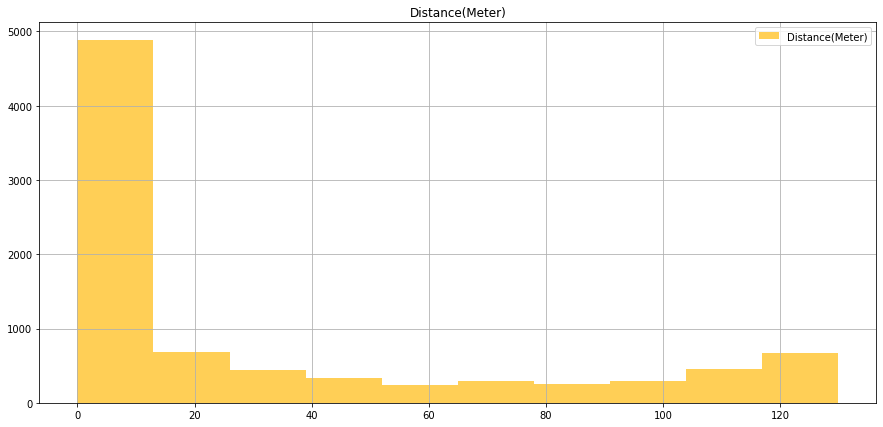

In [188]:
df_temp.hist(column='Distance(Meter)',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

array([[<AxesSubplot:title={'center':'total_day'}>]], dtype=object)

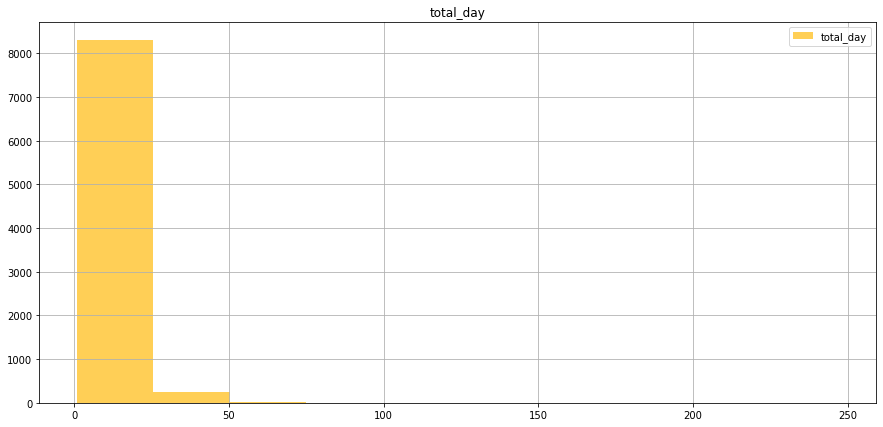

In [189]:
df_temp.hist(column='total_day',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56',
             bins=10)

array([[<AxesSubplot:title={'center':'total_signal'}>]], dtype=object)

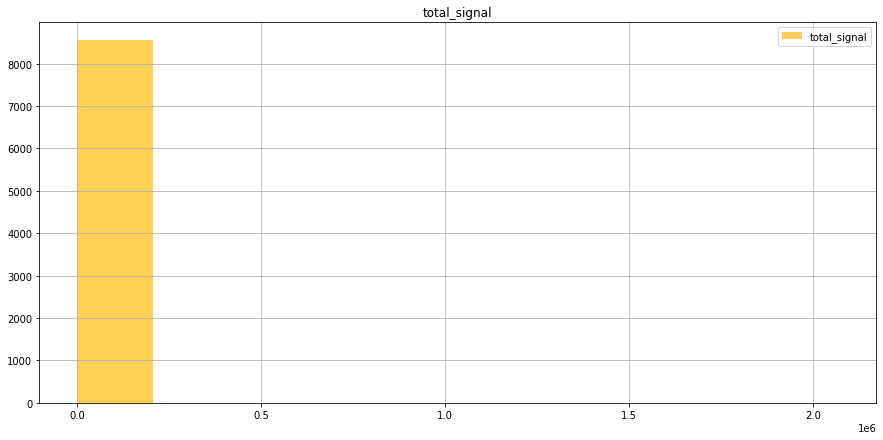

In [190]:
df_temp.hist(column='total_signal',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

In [191]:
df_temp.describe()

max_lat      min_lat      max_lng      min_lng  Distance(Meter)  \
count  8560.000000  8560.000000  8560.000000  8560.000000      8560.000000   
mean     51.460604    51.460474    -0.932569    -0.932813        31.627209   
std       0.000196     0.000130     0.000316     0.000306        43.088360   
min      51.460381    51.460381    -0.933235    -0.933236         0.000000   
25%      51.460442    51.460394    -0.932897    -0.933040         0.000000   
50%      51.460494    51.460420    -0.932479    -0.932915         6.399192   
75%      51.460775    51.460491    -0.932252    -0.932558        56.120354   
max      51.460960    51.460960    -0.932221    -0.932223       129.879876   

         total_day  total_signal      Weekday      Weekend  
count  8560.000000  8.560000e+03  8560.000000  8560.000000  
mean      3.687734  3.629691e+03     3.599766     0.087967  
std       8.240204  3.664430e+04     7.543934     1.421907  
min       1.000000  2.000000e+00     0.000000     0.000000  
25%       1.000000  1.300000e+01     1.000000     0.000000  
50%       1.000000  1.300000e+01     1.000000     0.000000  
75%       2.000000  2.022500e+02     2.000000     0.000000  
max     247.000000  2.069037e+06   179.000000    68.000000

## Define the characteristics of Mac ID

Fixed device:
1. Distance < 45 meters
2. Frequency in days >= 5 days / a year
3. Contain data in weekends
4. TODO: Data present whole days
5. TODO: High density: low variance

Mobile device:
1. Distance >= 45 meters 

TODO: 
 - Security guard: 
 1. Night shift
 2. Frequency in days > 5
 3. Contain data in weekend
 - Employee:
 1. Frequency in days > 5
 2. No weekends
 - Visitors:
 1. Frequency in days <= 5
 2. No weekends

In [192]:
# Define the Job function
df_temp['Mobile_or_fixed'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<10, 'Mobile_or_fixed'] = 'Fixed Device'
df_temp

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
0     00:08:22:00:b9:fb  51.460393  51.460393 -0.932497 -0.932497   
2     00:08:22:0e:c4:fb  51.460420  51.460420 -0.932617 -0.932617   
3     00:08:22:20:bc:fb  51.460448  51.460382 -0.932492 -0.932658   
4     00:08:22:24:b7:fb  51.460696  51.460633 -0.932276 -0.932314   
5     00:08:22:24:bd:fb  51.460389  51.460383 -0.932539 -0.932548   
...                 ...        ...        ...       ...       ...   
8862  fc:a6:67:be:c0:a5  51.460949  51.460391 -0.932262 -0.932578   
8863  fc:d8:48:80:ab:de  51.460513  51.460386 -0.932489 -0.933054   
8864  fc:db:b3:31:4e:a8  51.460411  51.460411 -0.933036 -0.933036   
8865  fc:f8:ae:5a:6f:ea  51.460608  51.460410 -0.932323 -0.932448   
8866  fc:fc:48:36:16:6b  51.460906  51.460602 -0.932221 -0.932423   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
0            0.085973          1            13      1.0      0.0   
2            0.000000          1             2      1.0      0.0   
3           19.917625          1             6      1.0      0.0   
4            8.172743          1            11      1.0      0.0   
5            1.212654          1             2      1.0      0.0   
...               ...        ...           ...      ...      ...   
8862        71.307240          4           300      4.0      0.0   
8863        64.369748          2           315      2.0      0.0   
8864         0.000000          1            13      1.0      0.0   
8865        26.020636          1           321      1.0      0.0   
8866        40.561440          1           114      1.0      0.0   

     Mobile_or_fixed  
0       Fixed Device  
2       Fixed Device  
3      Mobile Device  
4       Fixed Device  
5       Fixed Device  
...              ...  
8862   Mobile Device  
8863   Mobile Device  
8864    Fixed Device  
8865   Mobile Device  
8866   Mobile Device  

[8560 rows x 11 columns]

In [193]:
df_temp["Mobile_or_fixed"].value_counts()

Fixed Device     4657
Mobile Device    3903
Name: Mobile_or_fixed, dtype: int64

In [195]:
#Select fixed device
Fix_device = df_temp[df_temp['Mobile_or_fixed']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False)
Fix_device

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
3198  80:58:f8:3a:5a:7a  51.460457  51.460446 -0.932830 -0.932919   
6030  bc:98:df:e8:3f:1e  51.460494  51.460483 -0.933131 -0.933221   
693   14:9f:3c:47:98:87  51.460487  51.460468 -0.933108 -0.933196   
7556  d0:77:14:e4:d7:ad  51.460492  51.460404 -0.933021 -0.933038   
7369  d0:77:14:bf:ed:ab  51.460491  51.460401 -0.932771 -0.932772   
...                 ...        ...        ...       ...       ...   
3827  80:58:f8:96:35:d4  51.460420  51.460420 -0.932772 -0.932772   
3830  80:58:f8:96:c9:c5  51.460491  51.460491 -0.932771 -0.932771   
3831  80:58:f8:96:ed:e9  51.460457  51.460457 -0.932919 -0.932919   
3834  80:58:f8:97:36:1f  51.460406  51.460406 -0.932815 -0.932815   
8864  fc:db:b3:31:4e:a8  51.460411  51.460411 -0.933036 -0.933036   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
3198         9.979462          1            13      1.0      0.0   
6030         9.976864          1            14      1.0      0.0   
693          9.968938          1            38      1.0      0.0   
7556         9.955848          1            14      1.0      0.0   
7369         9.951015          1            13      1.0      0.0   
...               ...        ...           ...      ...      ...   
3827         0.000000          1            13      1.0      0.0   
3830         0.000000          1            13      1.0      0.0   
3831         0.000000          1            13      1.0      0.0   
3834         0.000000          1            12      1.0      0.0   
8864         0.000000          1            13      1.0      0.0   

     Mobile_or_fixed  
3198    Fixed Device  
6030    Fixed Device  
693     Fixed Device  
7556    Fixed Device  
7369    Fixed Device  
...              ...  
3827    Fixed Device  
3830    Fixed Device  
3831    Fixed Device  
3834    Fixed Device  
8864    Fixed Device  

[4657 rows x 11 columns]

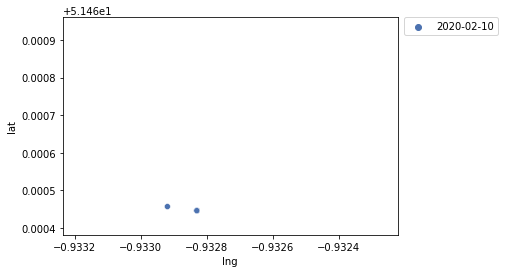

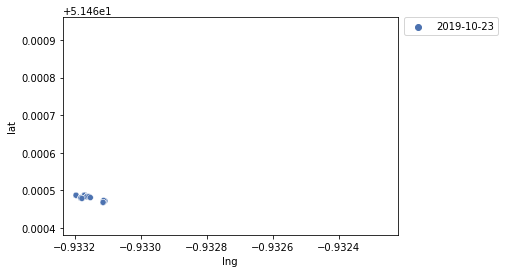

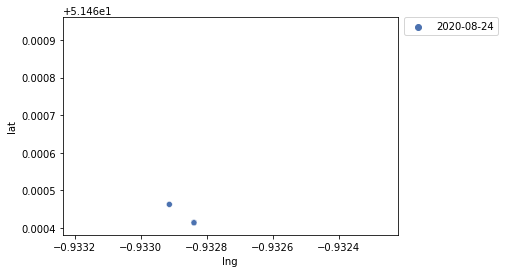

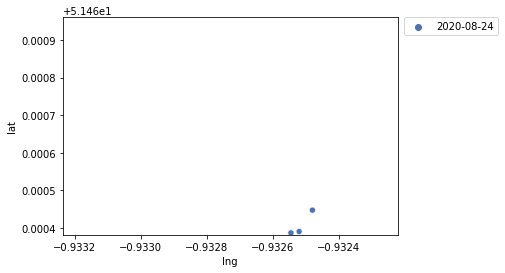

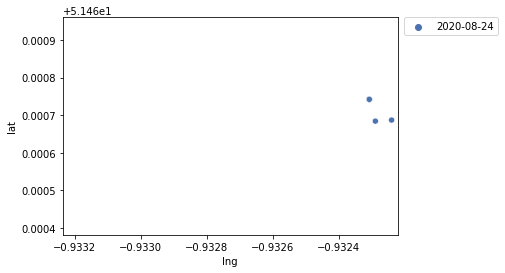

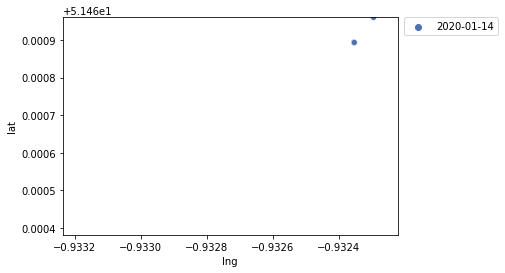

In [197]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])[:10]
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]

# print(top10_fix)
for i in top10_fix:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [198]:
# Create mobile device df
Mobile_device = df_temp[df_temp['Mobile_or_fixed']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False)
print(Mobile_device.shape)
Mobile_device.head()

(3903, 11)


ClientMacAddr   max_lat    min_lat   max_lng   min_lng  \
6391  cc:73:14:60:68:97  51.46096  51.460382 -0.932221 -0.933236   
5172  98:10:e8:06:85:6a  51.46096  51.460382 -0.932221 -0.933236   
5896  b4:9c:df:55:39:9a  51.46096  51.460382 -0.932221 -0.933236   
6319  cc:44:63:32:20:55  51.46096  51.460382 -0.932221 -0.933236   
4643  88:66:a5:0e:e4:28  51.46096  51.460382 -0.932221 -0.933235   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
6391       129.879876         44         74024     44.0      0.0   
5172       129.861023         32         57059     32.0      0.0   
5896       129.845072         15         13865     15.0      0.0   
6319       129.792706         32         56917     32.0      0.0   
4643       129.785866         29         33976     29.0      0.0   

     Mobile_or_fixed  
6391   Mobile Device  
5172   Mobile Device  
5896   Mobile Device  
6319   Mobile Device  
4643   Mobile Device

## Filter out mac id that occur in the designed space

In [201]:
df_office = df.query("lat>=51.46086267643394 and lat<=51.46093167542239")
df_office = df_office.query("lng>=-0.93233819710921 and lng<=-0.9322256859342483")
unique_office_mac = df_office["ClientMacAddr"].unique()
len(unique_office_mac)

1236

1193
c0:b6:58:a2:3c:78


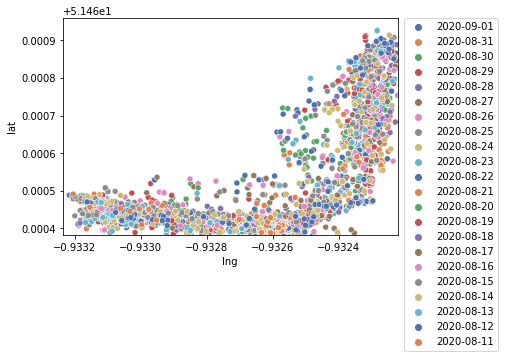

b4:9c:df:63:d2:20


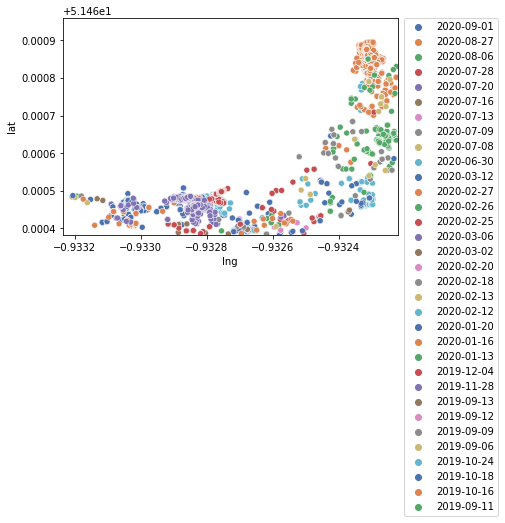

1c:5c:f2:f3:7a:fd


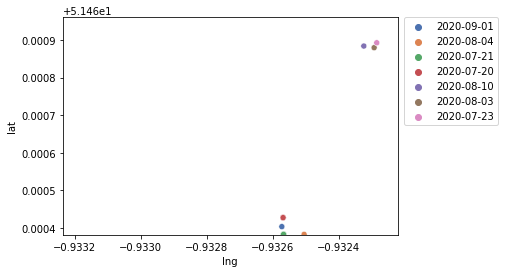

88:66:a5:da:26:f7


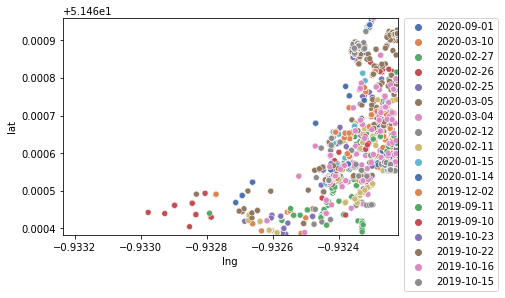

b4:9c:df:31:89:ea


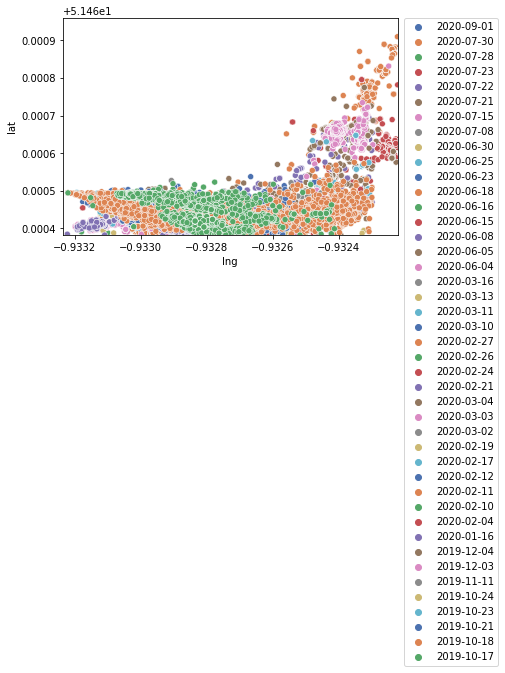

90:61:ae:25:4e:6e


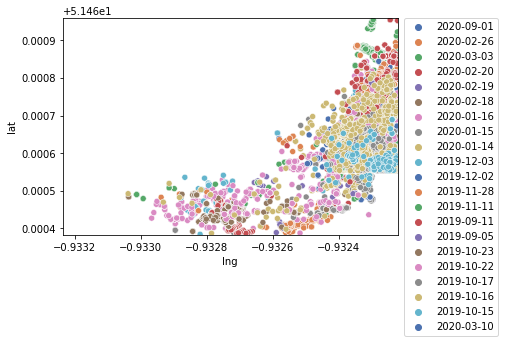

88:66:a5:55:20:94


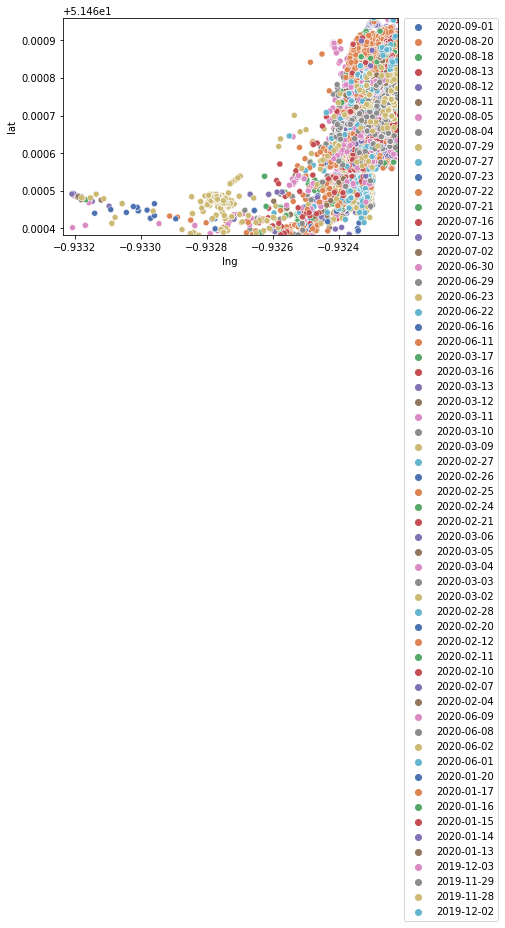

98:10:e8:06:8e:52


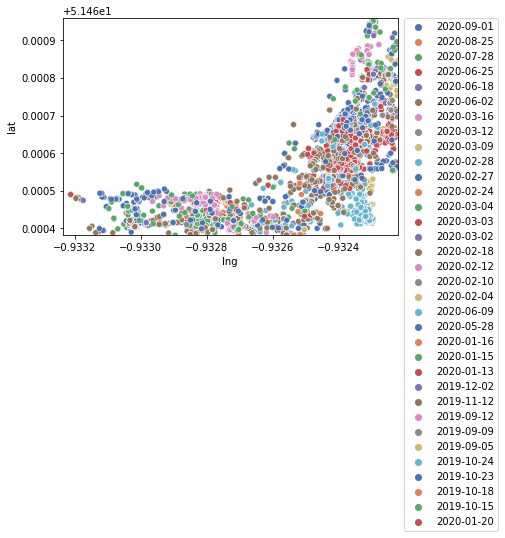

88:66:a5:55:52:f9


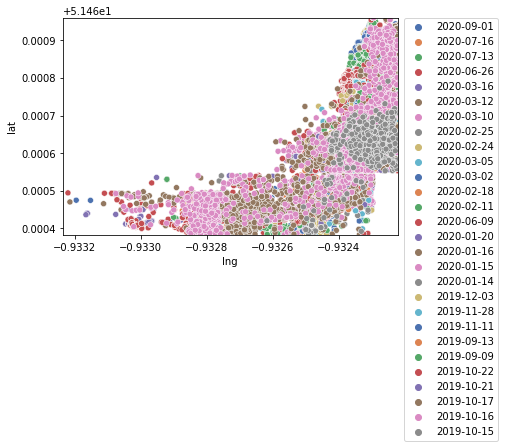

cc:44:63:22:a6:39


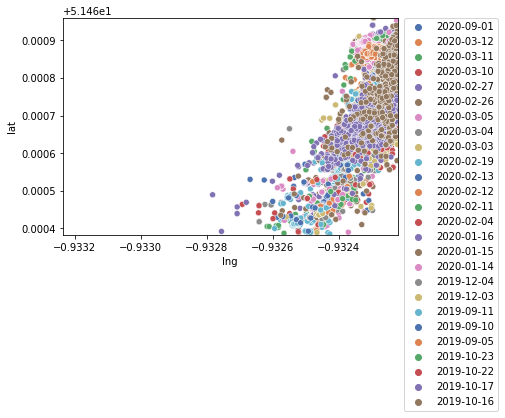

88:66:a5:10:be:cb


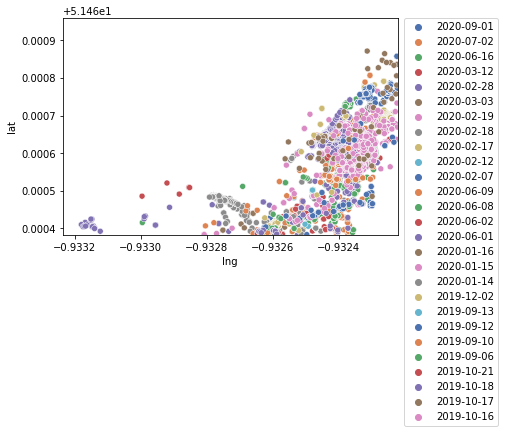

8c:f5:a3:cd:d2:db


9c:8c:6e:46:0b:7c


b4:ef:39:c3:4a:2a


60:e3:ac:be:c5:56


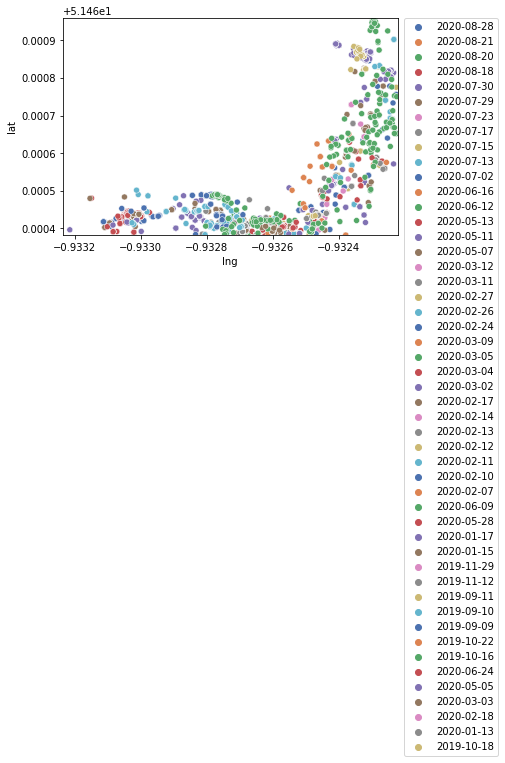

9c:da:3e:80:28:c0


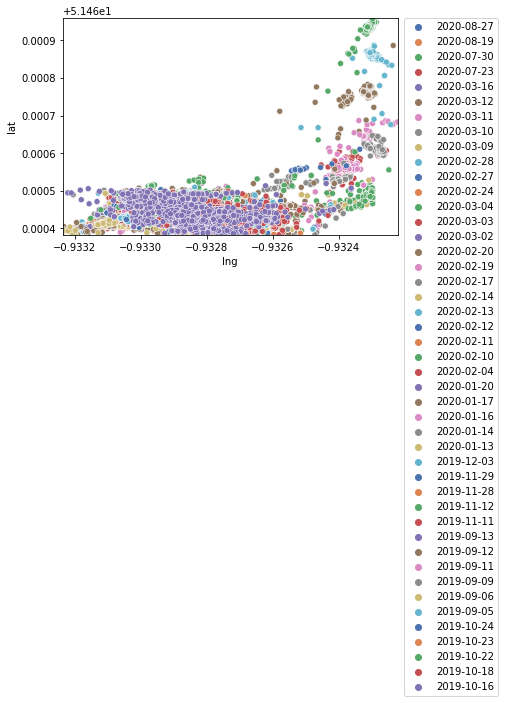

88:66:a5:37:7d:95


98:10:e8:08:43:ef


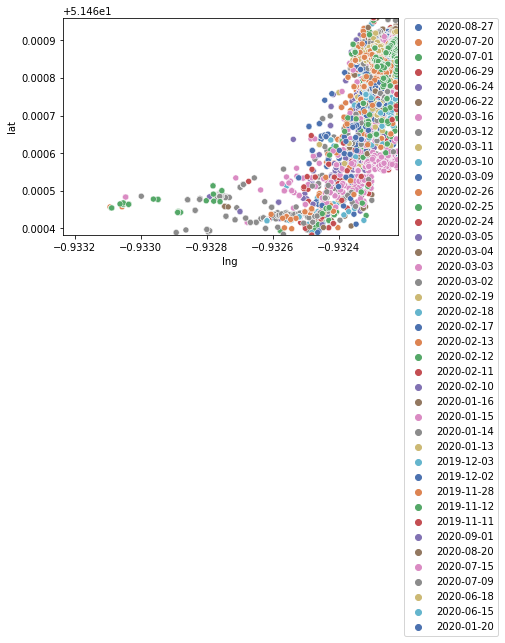

ec:9b:f3:07:70:0c


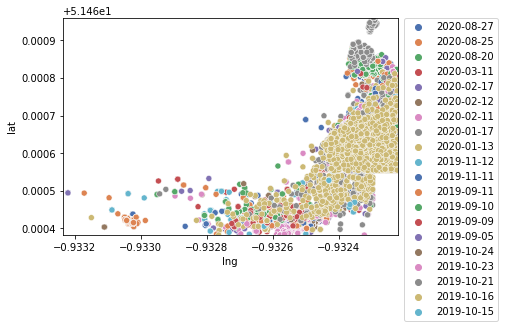

58:e2:8f:c1:61:17


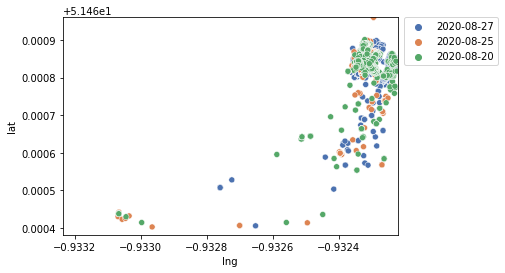

In [203]:
# Select mac id that is mobile, occurs in the designed area, and weekday only
df_office = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['ClientMacAddr'].isin(unique_office_mac)) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
print(len(df_office["ClientMacAddr"].unique()))

# Pick only 20 mac id
for i in df_office["ClientMacAddr"].unique()[:20]:
    print(i)
    person = df[df['ClientMacAddr'] == i]
    # Color category by date
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

78


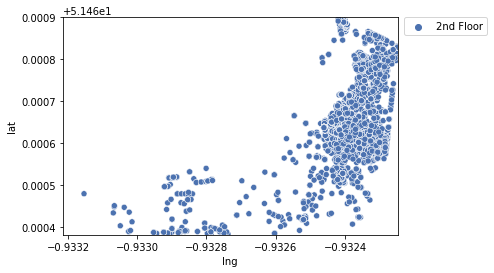

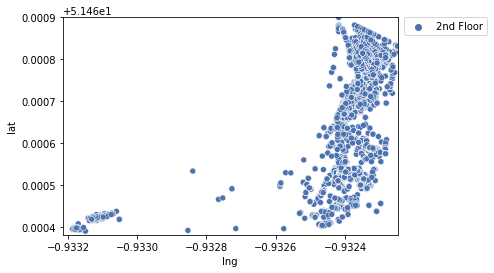

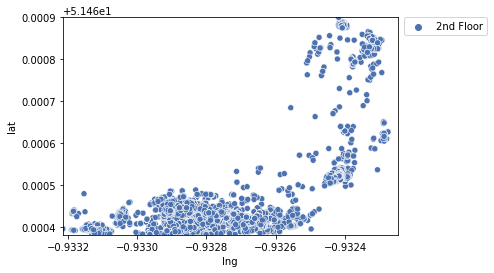

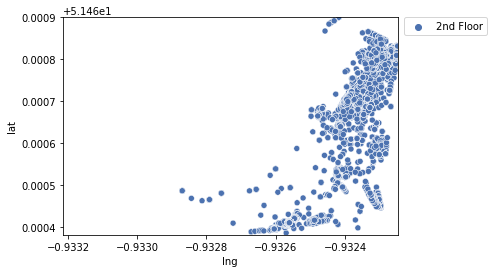

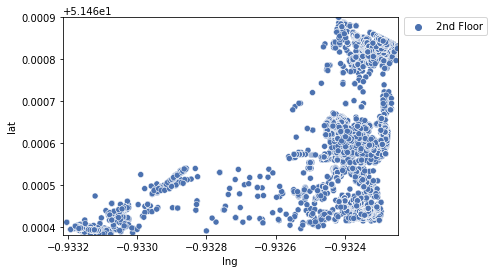

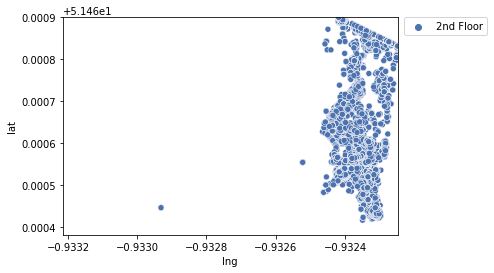

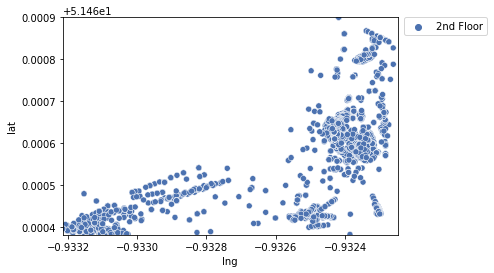

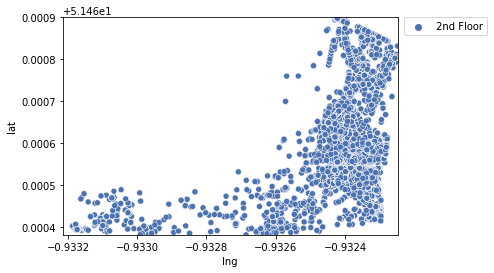

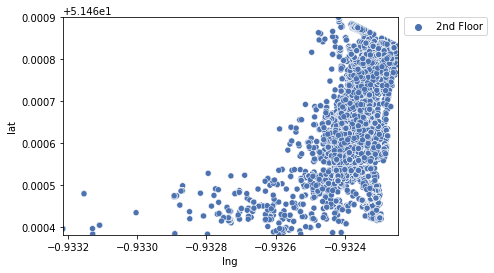

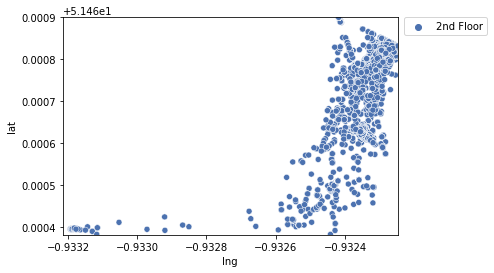

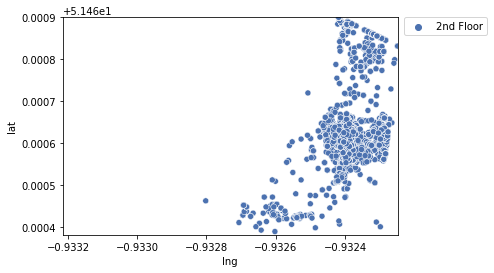

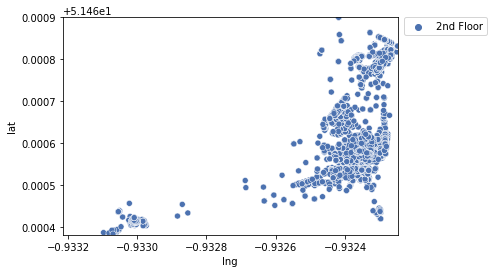

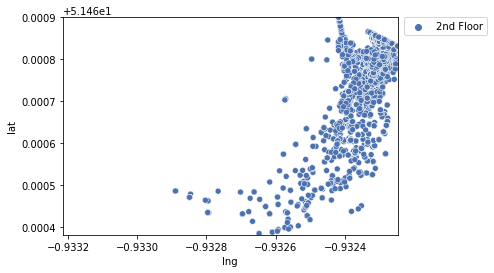

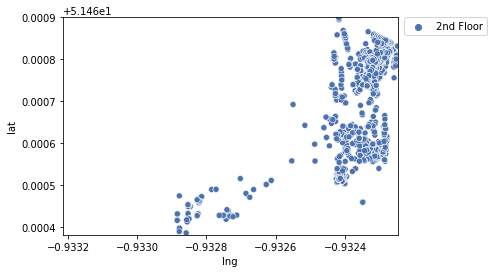

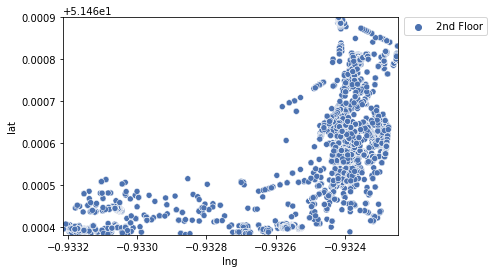

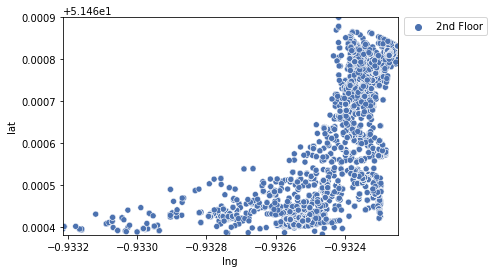

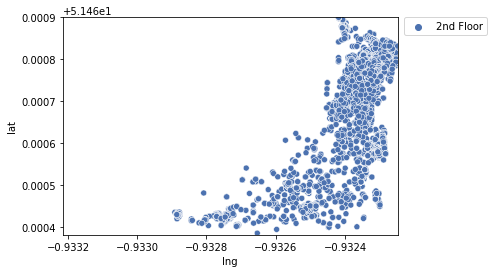

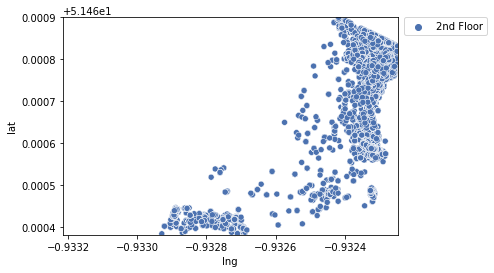

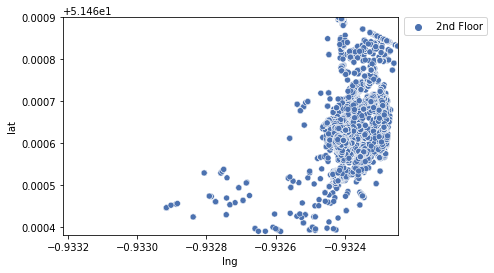

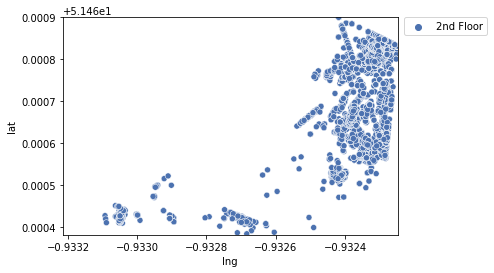

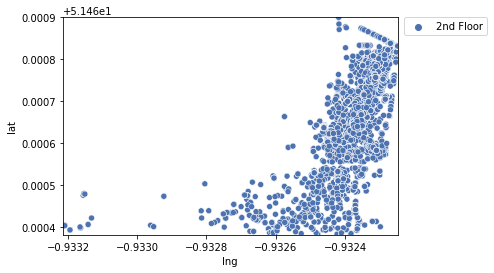

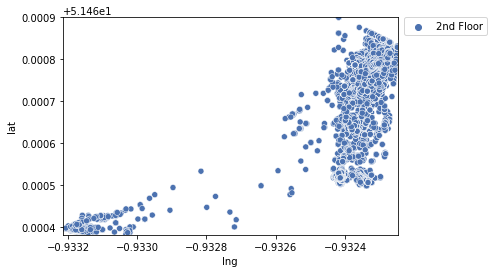

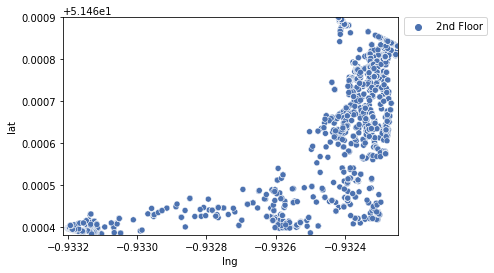

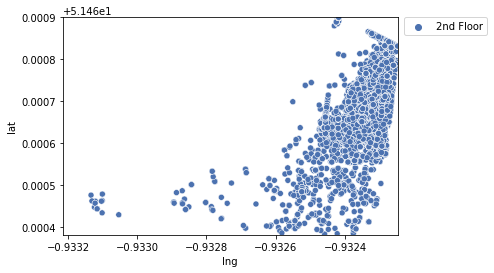

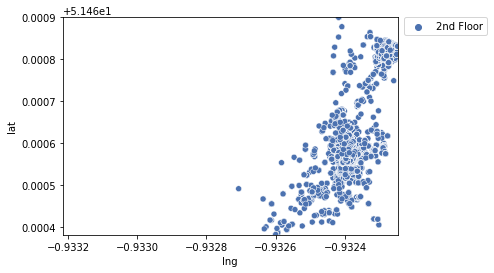

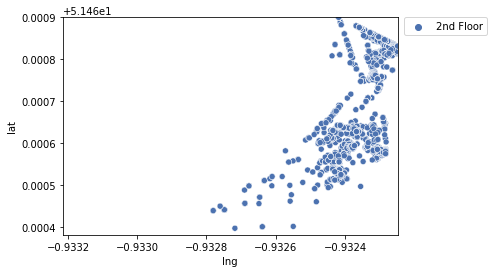

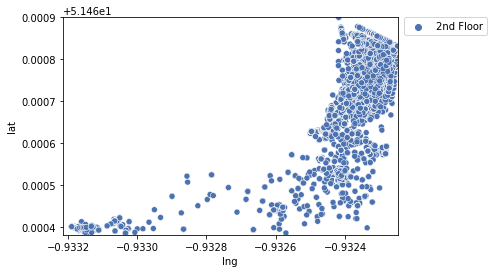

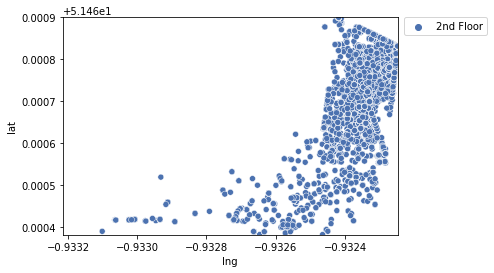

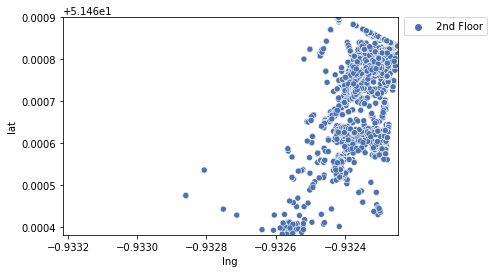

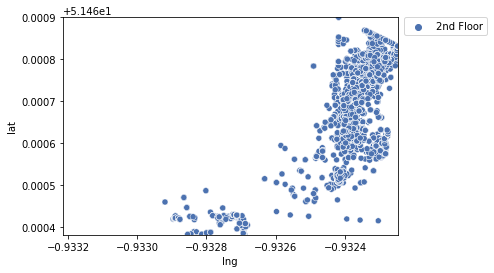

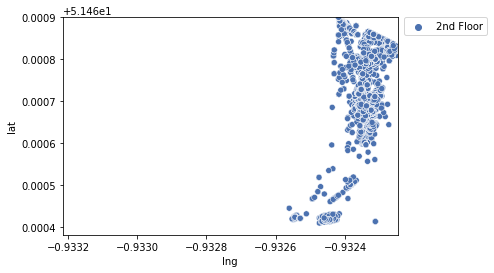

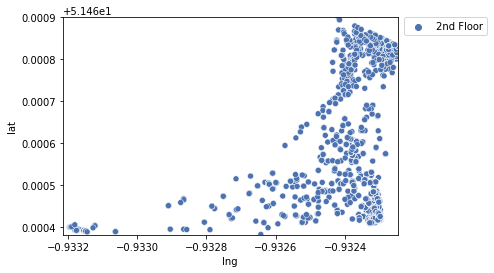

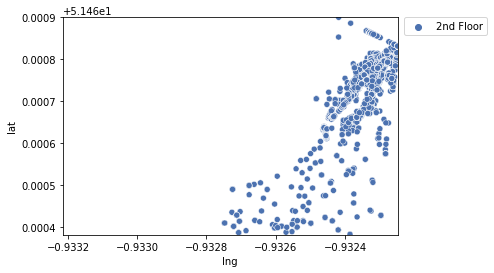

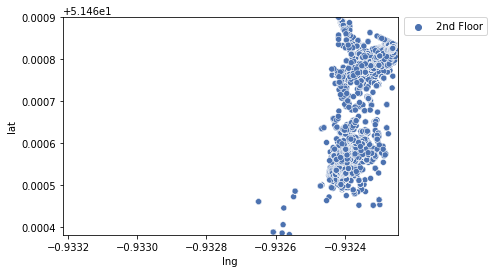

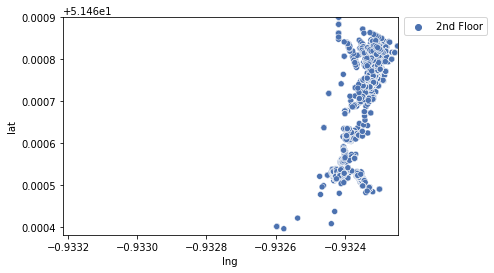

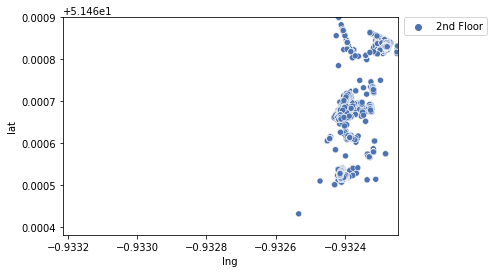

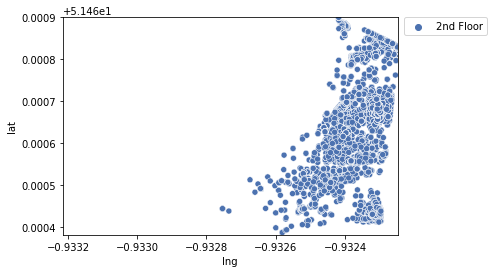

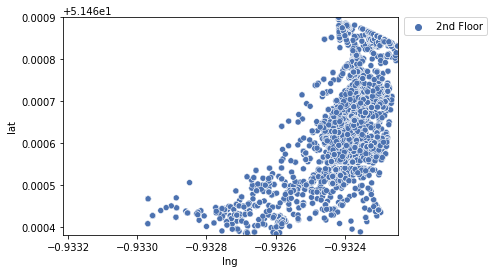

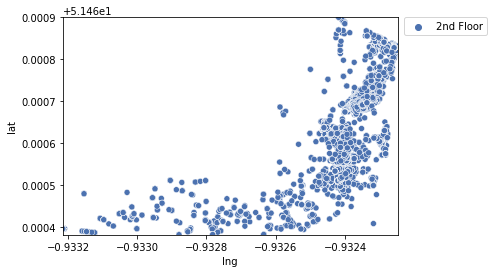

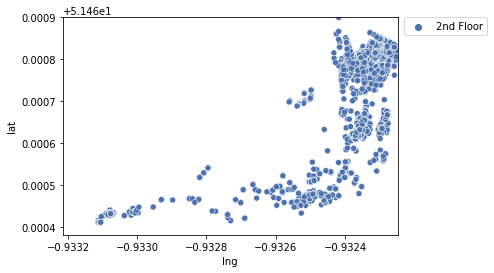

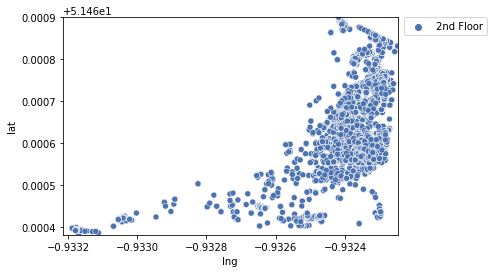

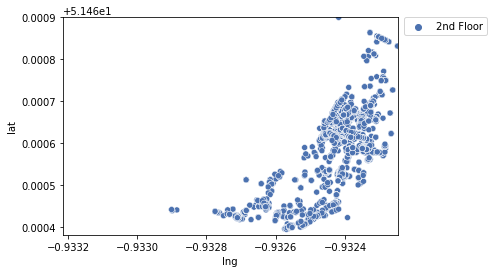

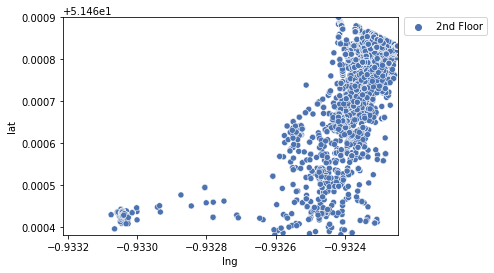

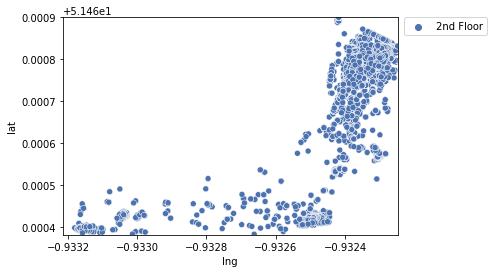

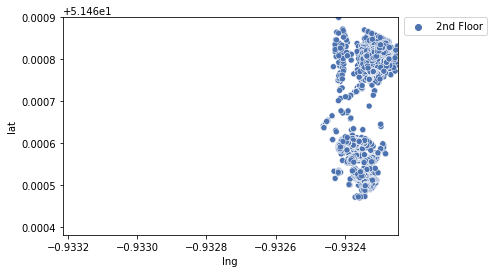

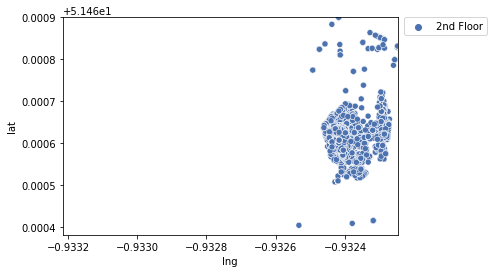

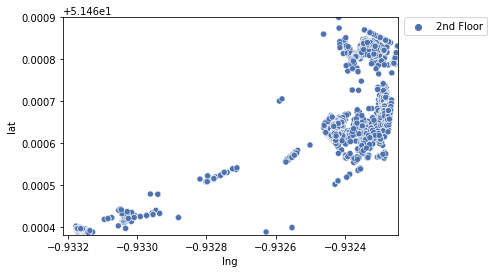

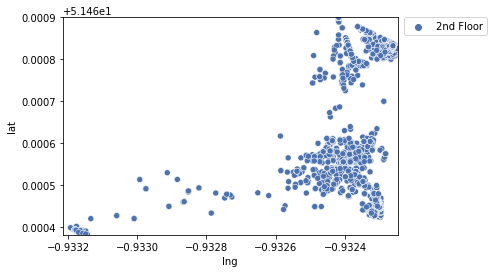

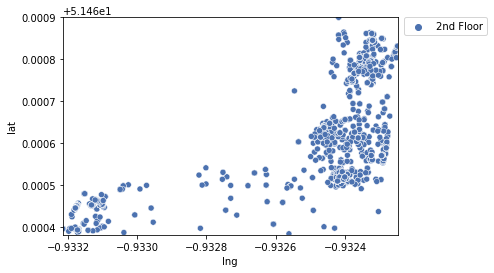

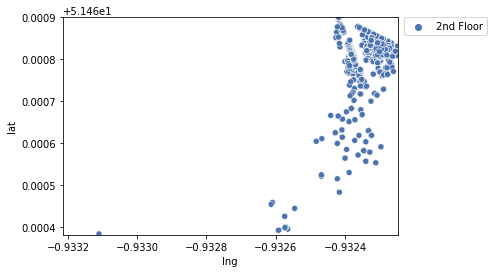

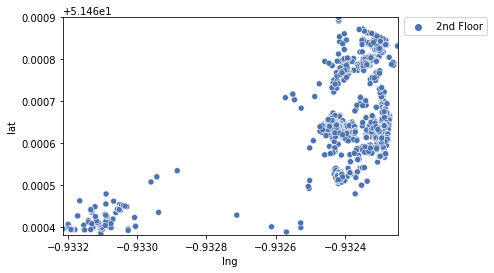

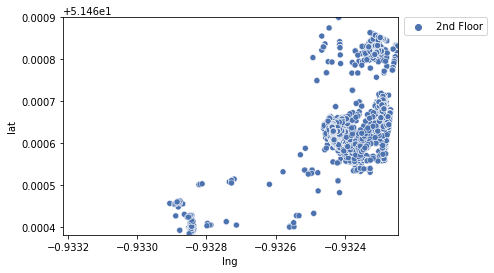

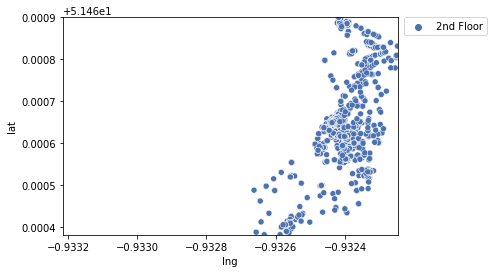

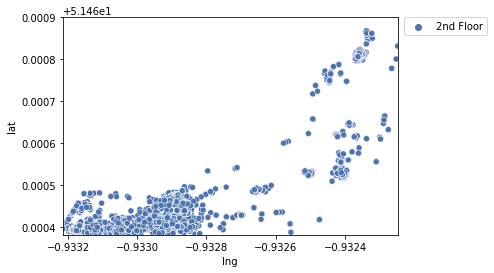

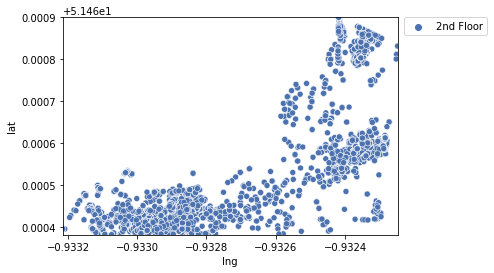

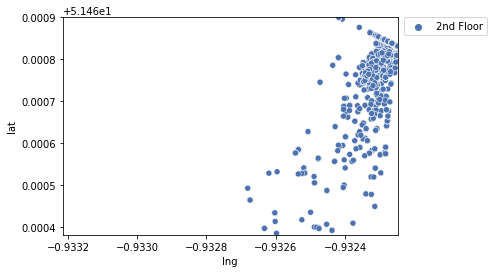

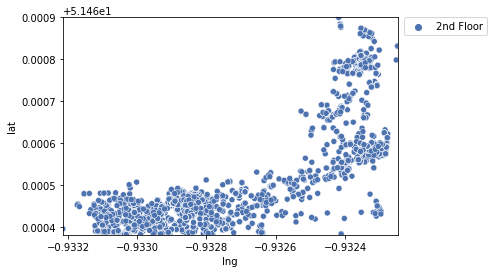

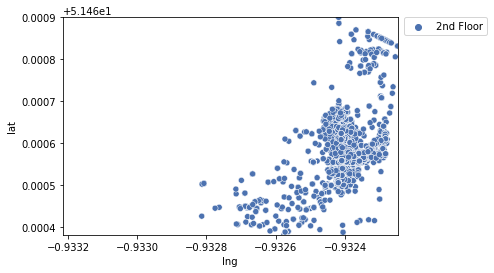

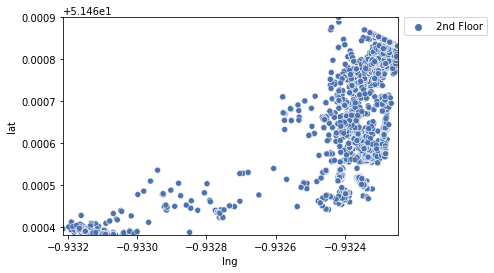

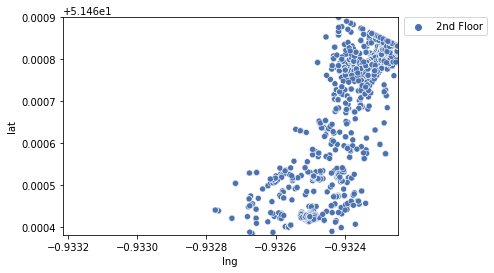

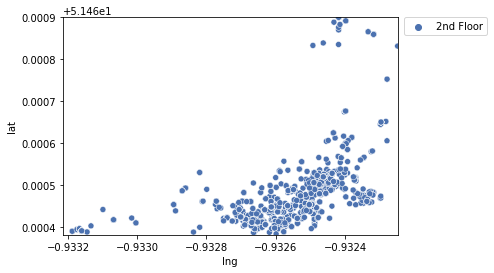

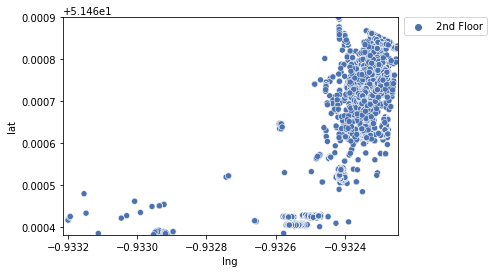

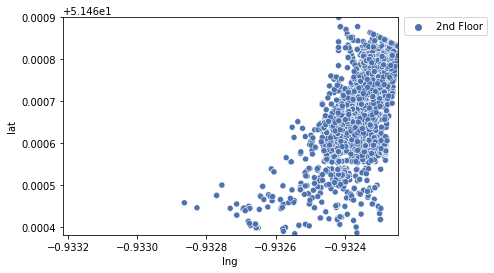

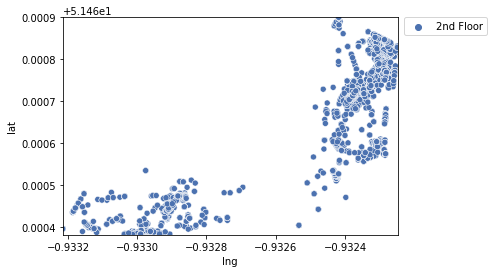

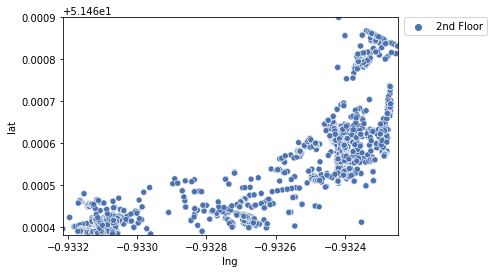

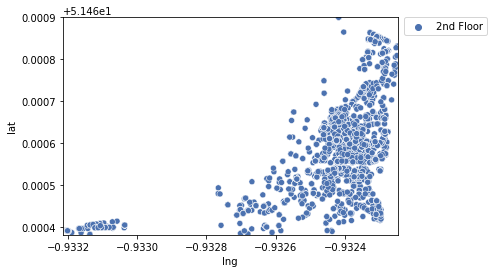

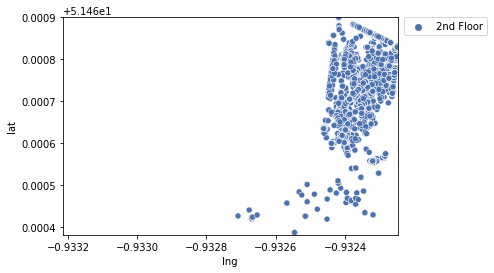

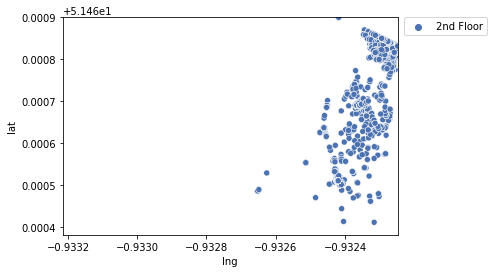

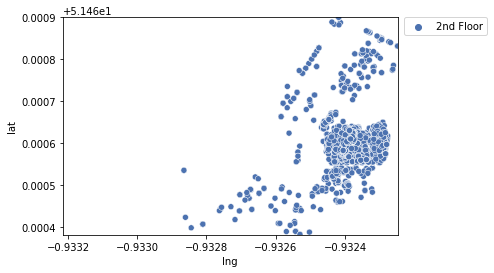

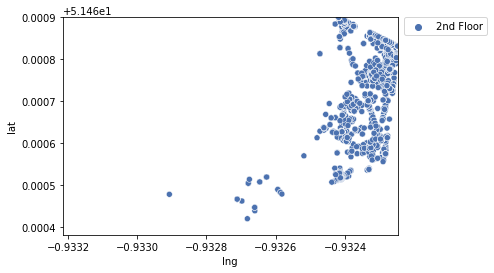

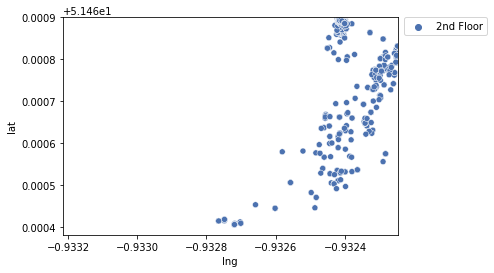

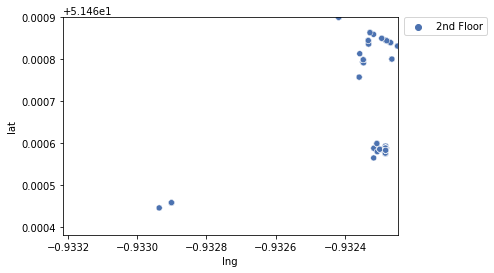

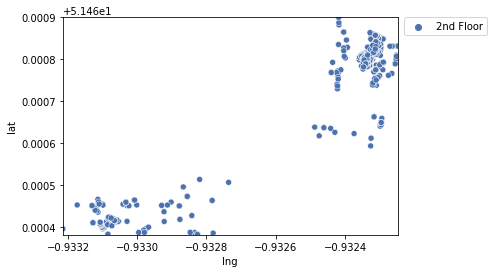

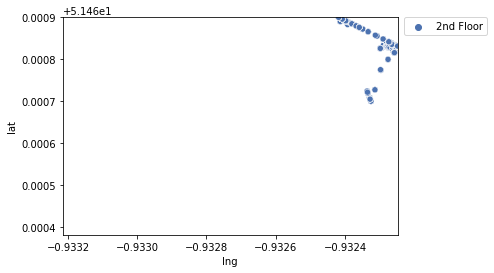

In [84]:
# Plot the category color by level, not date
for i in df_office["ClientMacAddr"].unique()[:20]:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

# Plot machinary

In [180]:
Fix_device.head()

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
3198  80:58:f8:3a:5a:7a  51.460457  51.460446 -0.932830 -0.932919   
6030  bc:98:df:e8:3f:1e  51.460494  51.460483 -0.933131 -0.933221   
693   14:9f:3c:47:98:87  51.460487  51.460468 -0.933108 -0.933196   
7556  d0:77:14:e4:d7:ad  51.460492  51.460404 -0.933021 -0.933038   
7369  d0:77:14:bf:ed:ab  51.460491  51.460401 -0.932771 -0.932772   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
3198         9.979462          1            13      1.0      0.0   
6030         9.976864          1            14      1.0      0.0   
693          9.968938          1            38      1.0      0.0   
7556         9.955848          1            14      1.0      0.0   
7369         9.951015          1            13      1.0      0.0   

     Mobile_or_fixed  
3198    Fixed Device  
6030    Fixed Device  
693     Fixed Device  
7556    Fixed Device  
7369    Fixed Device

In [181]:
machinery_df = Fix_device.loc[Fix_device["total_day"] > 5, :]
machinery_df

(22, 11)

60:57:18:d7:19:c3


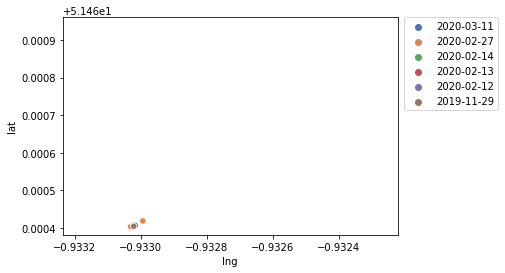

f0:98:9d:67:ba:9f


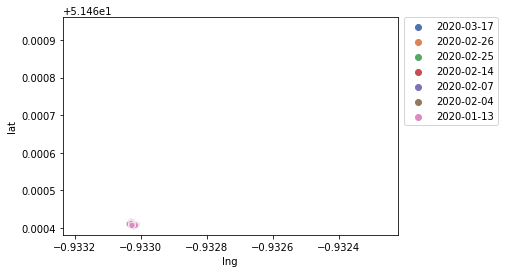

dc:53:60:c0:18:5e


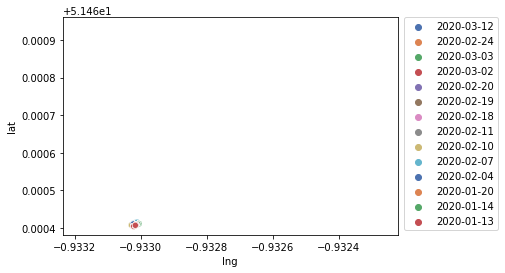

dc:53:60:c0:18:3b


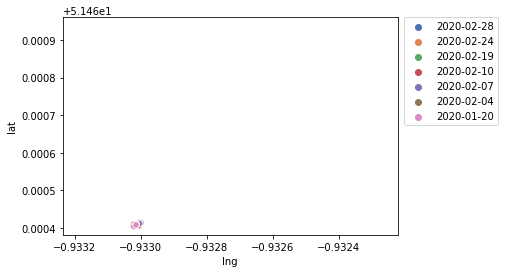

fc:4d:d4:55:31:b4


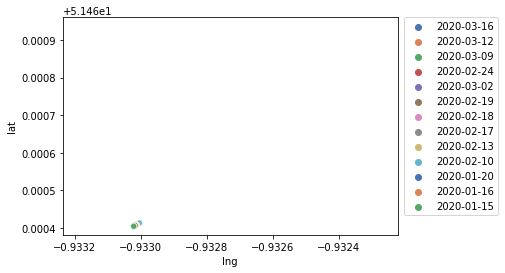

9c:4e:36:92:ec:e4


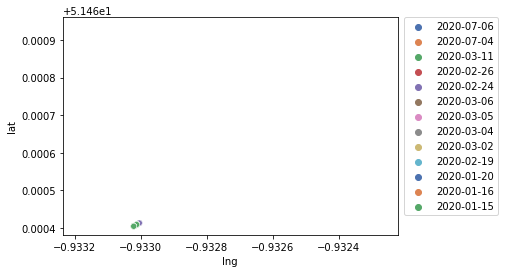

9c:b6:d0:e1:9b:4b


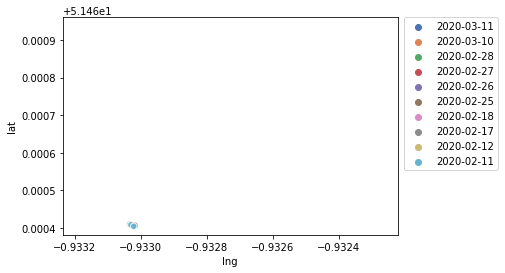

b4:6b:fc:06:18:69


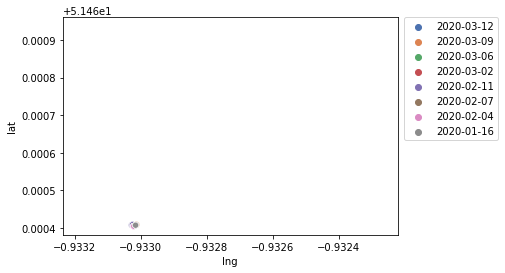

6c:c7:ec:66:ab:a5


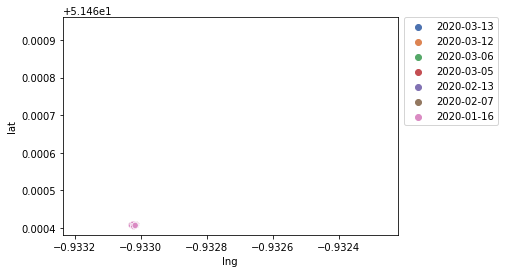

9c:4e:36:86:82:ec


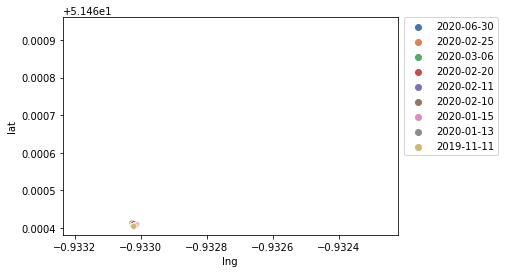

4c:66:41:db:99:33


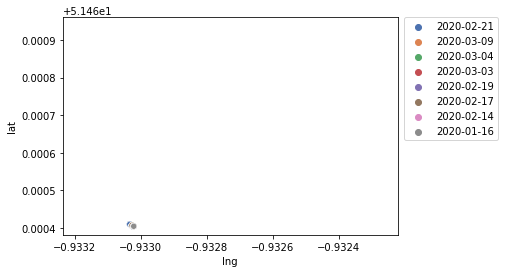

bc:e1:43:2a:fe:d9


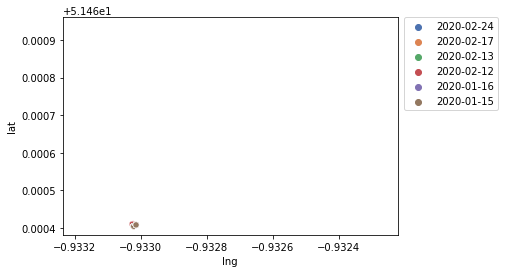

1c:5c:f2:ac:52:3f


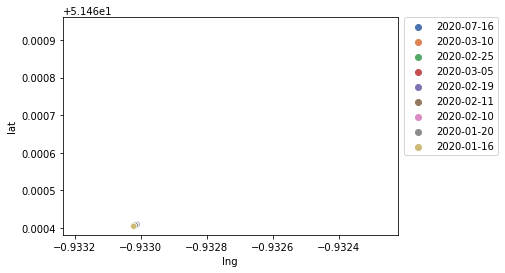

5c:e0:c5:ad:af:f2


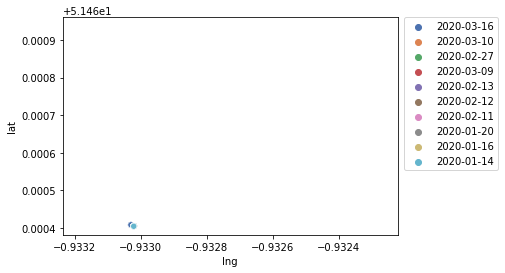

6c:c7:ec:6c:ec:9a


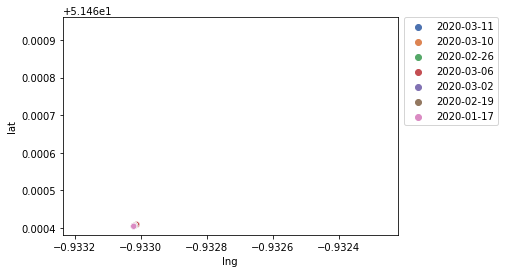

04:72:95:42:af:df


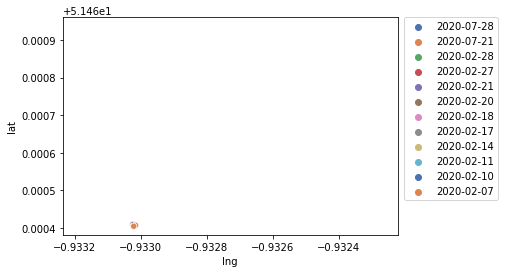

c4:e9:84:09:a4:6f


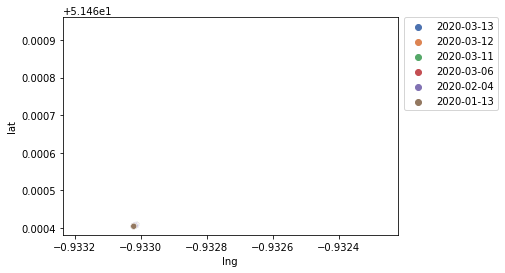

94:0c:98:21:6b:6d


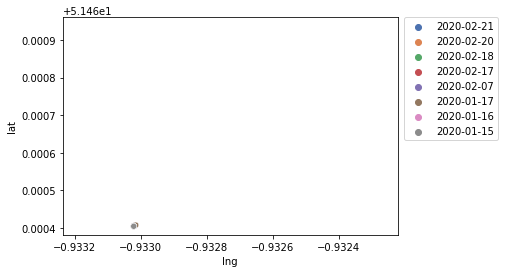

9c:b6:d0:e2:75:ed


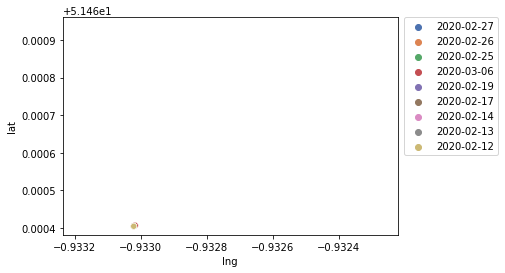

a4:f1:e8:1c:a9:04


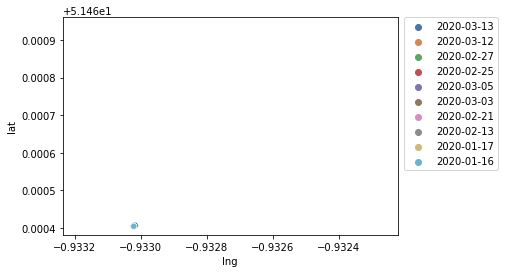

30:07:4d:f3:43:15


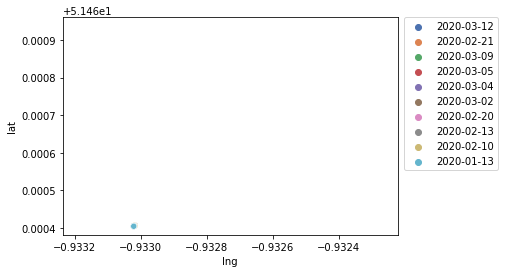

d8:68:c3:a3:80:91


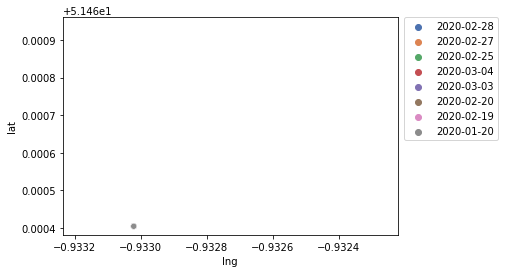

In [184]:
for i in machinery_df["ClientMacAddr"].unique():
    print(i)
    # plot machinary colored by date
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

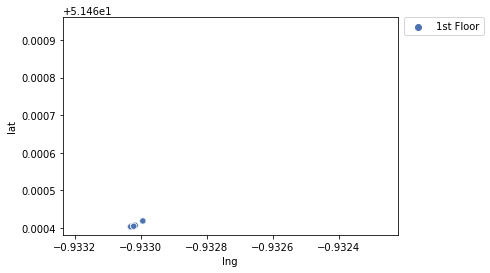

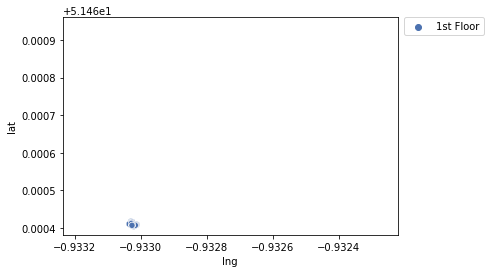

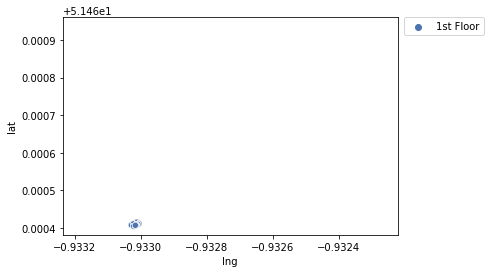

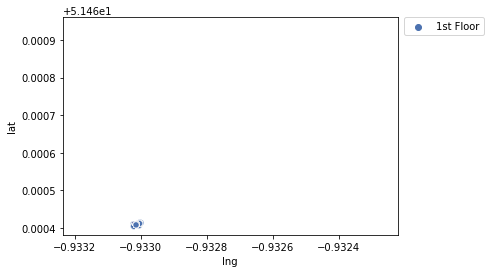

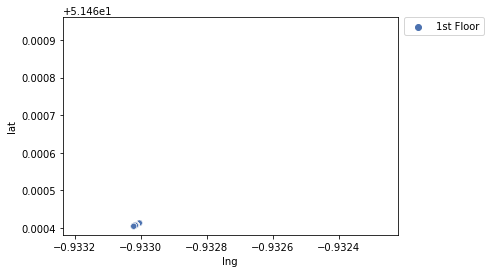

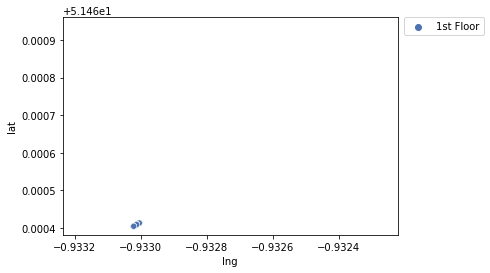

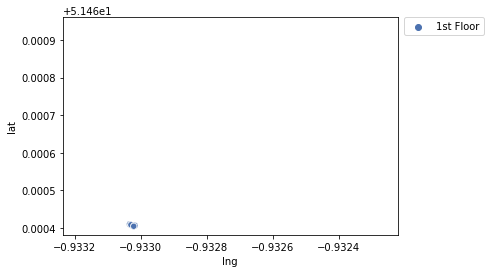

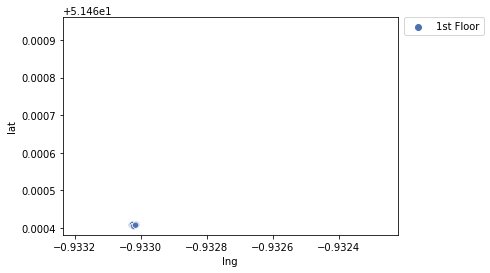

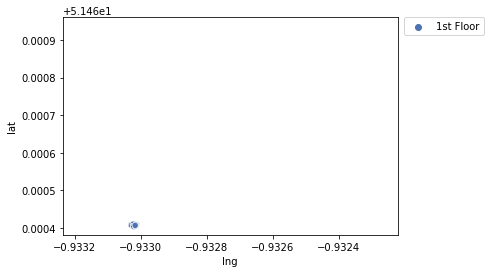

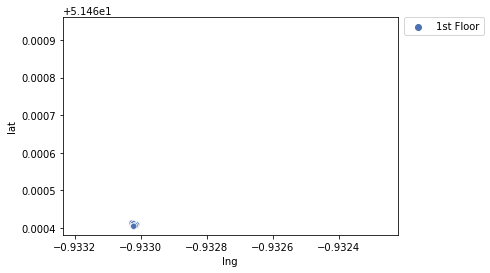

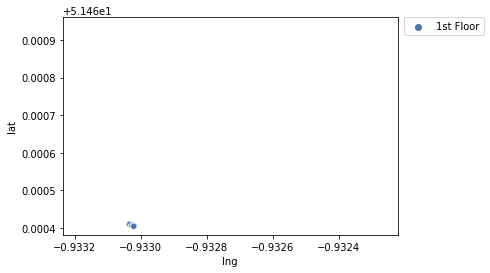

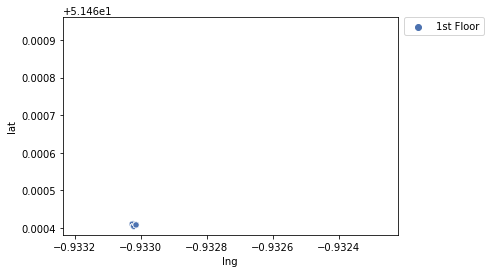

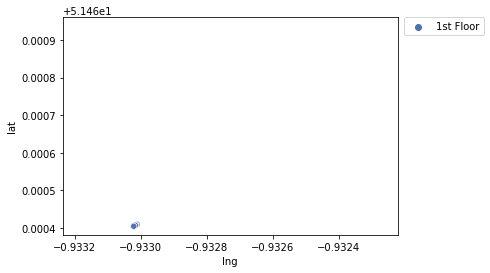

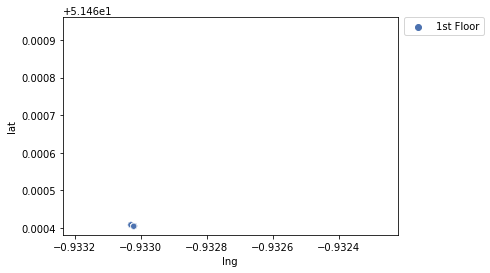

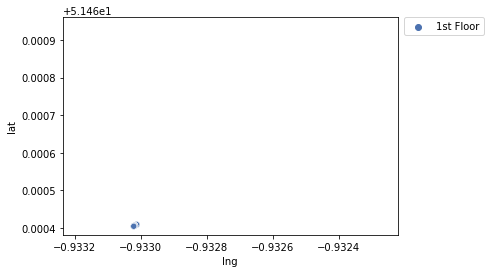

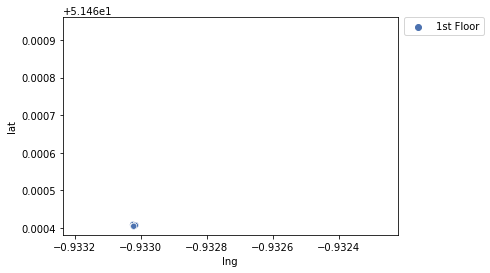

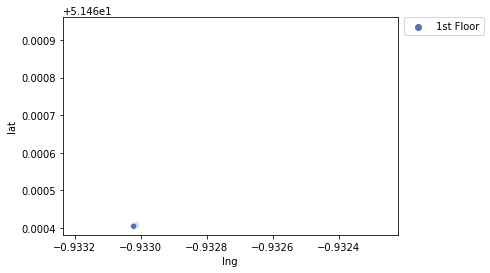

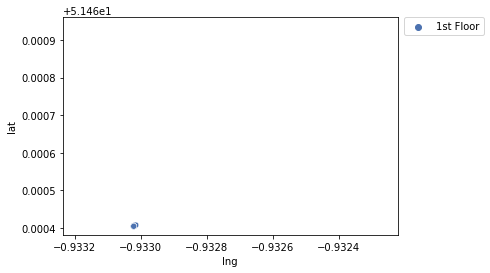

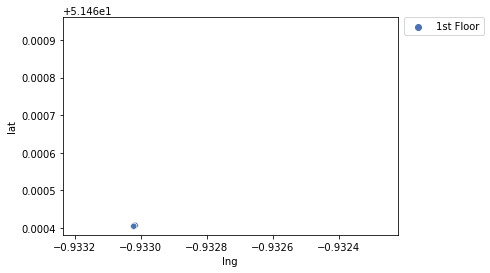

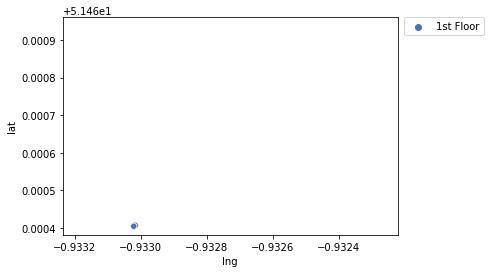

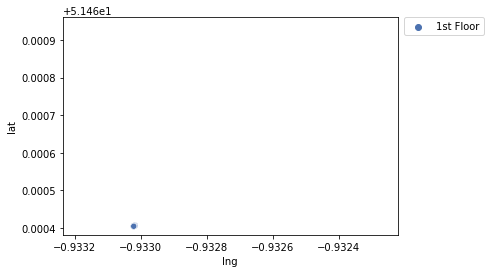

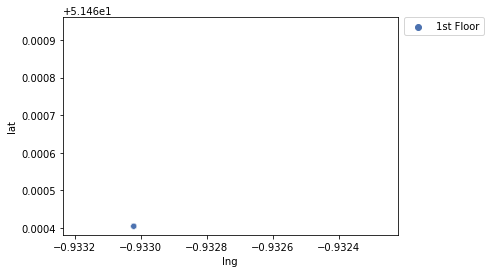

In [182]:
# plot machinary colored by level
for i in machinery_df["ClientMacAddr"].unique():
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()